In [ ]:
#IMPORTING: Importing Modules
!pip install ydata_profiling
from ydata_profiling import ProfileReport
!pip install opendatasets
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [ ]:
#IMPORTING DATA: Kaggle username and key.
 #{"username":"joshuahiatt","key":"0e0d379008f0bf32b03c49a253c03b4a"}

In [ ]:
#Downloading Kaggle dataset and storing it to a directory.
od.download(
    "https://www.kaggle.com/datasets/cid007/pizza-restaurants-us", force=True
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuahiatt
Your Kaggle Key: ··········


100%|██████████| 395k/395k [00:00<00:00, 87.6MB/s]

In [ ]:
#Accessing the CSV file.
pizza_directory = ('./pizza-restaurants-us/Pizza_Restaurants_and_the_Pizza_They_Sell.csv')

In [ ]:
#Reading the CSV File and storing in a dataframe.
pizza = pd.read_csv(pizza_directory)

In [ ]:
pizza.head()

In [ ]:
#Makeing all string objects lower case.
for col in pizza:
  if pizza[col].dtype == 'object':
    pizza[col] = pizza[col].str.lower()

In [ ]:
#DATATYPES: Checking the data types of the pizza dataframe.
pizza.dtypes

id                    object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
menuPageURL           object
menus.amountMax      float64
menus.amountMin      float64
menus.description     object
menus.name            object
name                  object
postalCode            object
priceRangeMin          int64
priceRangeMax          int64
province              object
dtype: object

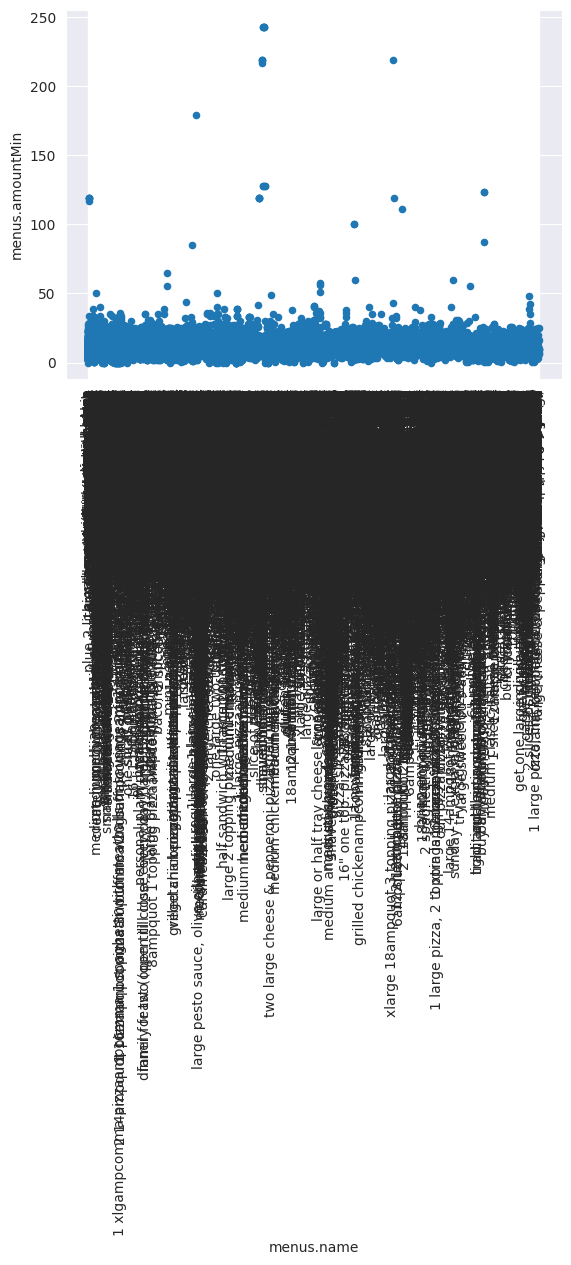

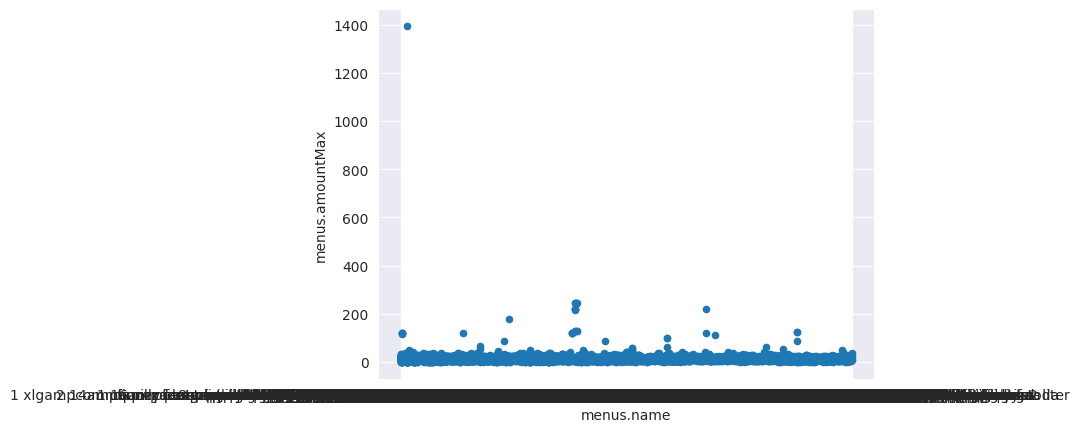

In [ ]:
#RANGES: Look at scatterplot of menus.amountMin and menus.amountMax to determine if there are any outliers.
pizza.plot(x='menus.name', y='menus.amountMin', kind='scatter')
plt.xticks(rotation=90)
pizza.plot(x='menus.name', y='menus.amountMax', kind='scatter')
plt.show()

In [ ]:
#Going to filter out any menu items from the data fram that are over $50 as that is where the majority of the data exists with few exceptions.
pizza = pizza[pizza['menus.amountMin'] <= 40.00]
pizza = pizza[pizza['menus.amountMax'] <= 40.00]

In [ ]:
#Confirming dataframe has been filtered to $50.00 or below price points.
pizza.plot(x='menus.name', y='menus.amountMin', kind='scatter')
pizza.plot(x='menus.name', y='menus.amountMax', kind='scatter')

In [ ]:
#DUPLICATES: Finding and removing duplicates. No Duplicates found just differing menu items at the same restaurant.
duplicates = pizza.duplicated()
pizza[duplicates]

id             address  \
104   avwcvcby_7pvs4fzyddm      8381 market st   
138   avwckj-gkufwrab5wle8  9705 mintworth ave   
166   avweegb3kufwrab5_r4w  1090 montgomery rd   
168   avweegb3kufwrab5_r4w  1090 montgomery rd   
353   avwdz7mkbyjofqcxoxec      1004 kings hwy   
...                    ...                 ...   
9582  avwdpkifin2l1wufx2fg         1552 fm 685   
9586  avwdpkifin2l1wufx2fg         1552 fm 685   
9590  avwdpkifin2l1wufx2fg         1552 fm 685   
9892  avwdk0eb_7pvs4fz2-lz   2313 e venango st   
9896  avwcr4hebyjofqcxhd2b  2310 virginia pkwy   

                                             categories  \
104                                         pizza place   
138   italian restaurant,pizza place,italian restaur...   
166                      italian restaurant,pizza place   
168                      italian restaurant,pizza place   
353                                         pizza place   
...                                                 ...   
9582                                        pizza place   
9586                                        pizza place   
9590                                        pizza place   
9892                                        pizza place   
9896  pizza place,restaurants,pizza,take out restaur...   

                  primaryCategories               city country  \
104   accommodation & food services         youngstown      us   
138   accommodation & food services          charlotte      us   
166   accommodation & food services  altamonte springs      us   
168   accommodation & food services  altamonte springs      us   
353   accommodation & food services              lewes      us   
...                             ...                ...     ...   
9582  accommodation & food services       pflugerville      us   
9586  accommodation & food services       pflugerville      us   
9590  accommodation & food services       pflugerville      us   
9892  accommodation & food services       philadelphia      us   
9896  accommodation & food services           mckinney      us   

                                                   keys   latitude  longitude  \
104            us/oh/youngstown/8381marketst/-697115922  40.996343 -80.662320   
138         us/nc/charlotte/9705mintworthave/1502696362  35.172024 -80.708379   
166   us/fl/altamontesprings/1090montgomeryrd/111408...  28.686584 -81.403849   
168   us/fl/altamontesprings/1090montgomeryrd/111408...  28.686584 -81.403849   
353                 us/de/lewes/1004kingshwy/1388074784  38.760778 -75.145791   
...                                                 ...        ...        ...   
9582            us/tx/pflugerville/1552fm685/1154079290  30.452988 -97.604454   
9586            us/tx/pflugerville/1552fm685/1154079290  30.452988 -97.604454   
9590            us/tx/pflugerville/1552fm685/1154079290  30.452988 -97.604454   
9892       us/pa/philadelphia/2313evenangost/1737226038  39.994090 -75.097180   
9896          us/tx/mckinney/2310virginiapkwy/572757474  33.198826 -96.642706   

     menuPageURL  menus.amountMax  menus.amountMin menus.description  \
104          NaN             8.99             8.99               NaN   
138          NaN            13.95            13.95               NaN   
166          NaN             7.00             7.00               NaN   
168          NaN             2.00             2.00               NaN   
353          NaN            12.50            12.50               NaN   
...          ...              ...              ...               ...   
9582         NaN            17.99            17.99               NaN   
9586         NaN            17.99            17.99               NaN   
9590         NaN            17.99            17.99               NaN   
9892         NaN             2.25             2.25               NaN   
9896         NaN            20.99            20.99               NaN   

                                    menus.name                        name  \
104  

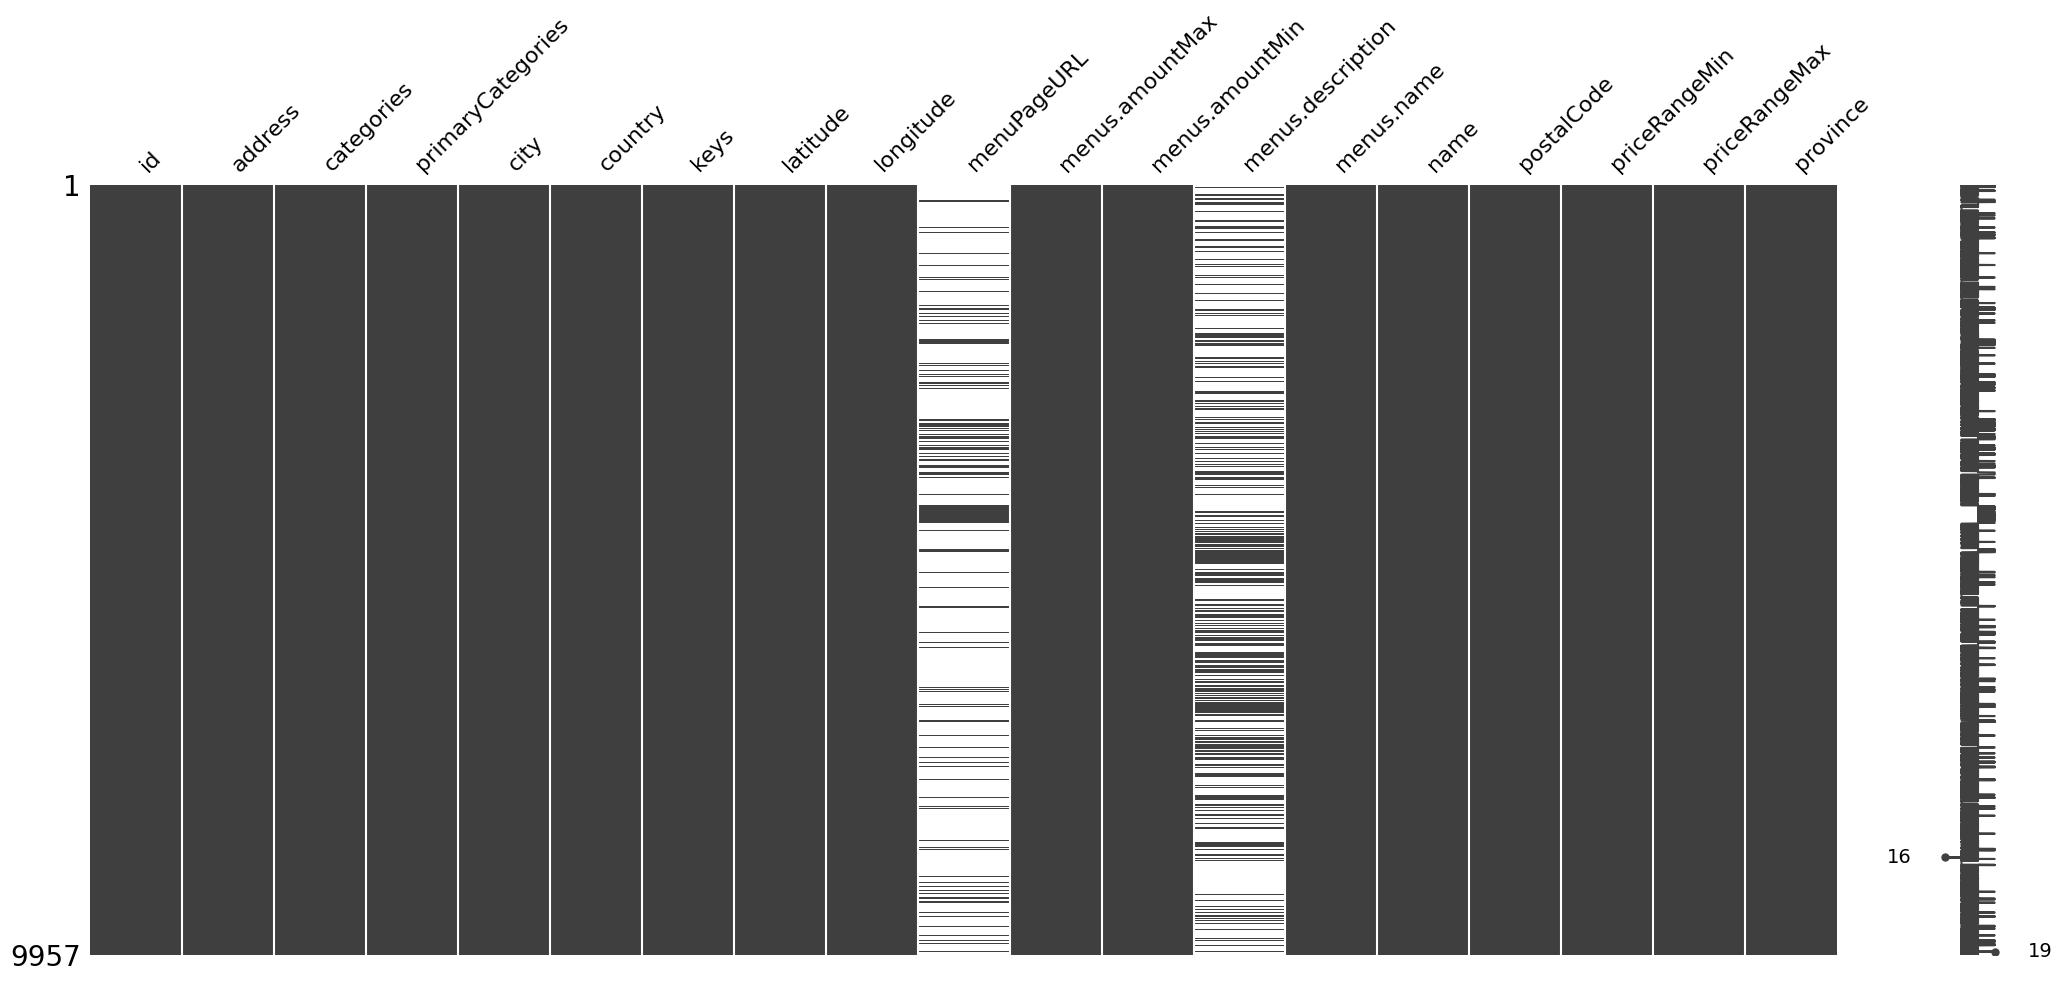

In [ ]:
#COMPLETENESS: Visualizing Missing data from dataframe. Lot of missing data in two columns that can be dropped.
msno.matrix(pizza)
plt.show()

In [ ]:
#Delete Columns with many missing data entries and unused columns
pizza_cleansed = pizza.drop(columns=['menuPageURL', 'menus.description', 'id', 'categories', 'primaryCategories', 'keys'])

In [ ]:
pizza_cleansed.head()

address             city country   latitude   longitude  \
0   4203 e kiehl ave         sherwood      us  34.832300  -92.183800   
1  25 e camelback rd          phoenix      us  33.509266 -112.073044   
2    3703 paxton ave       cincinnati      us  39.144883  -84.432685   
3    30495 john r rd  madison heights      us  42.516669  -83.106630   
4   3600 eastern ave        baltimore      us  39.286630  -76.566984   

   menus.amountMax  menus.amountMin    menus.name                 name  \
0             7.98             7.98  cheese pizza   shotgun dans pizza   
1             6.00             6.00  pizza cookie     sauce pizza wine   
2             6.49             6.49  pizza blanca        mios pizzeria   
3             5.99             5.99   small pizza  hungry howies pizza   
4             5.49             5.49     pizza sub     spartan pizzeria   

  postalCode  priceRangeMin  priceRangeMax province  
0      72120              0             25       ar  
1      85012              0             25       az  
2      45209              0             25       oh  
3      48071             25             40       mi  
4      21224              0             25       md

In [ ]:
#Rename columns for correct syntax.
pizza_cleansed.rename(columns={'menus.name':'menu_item', 'menus.amountMax':'menus_amountMax', 'menus.amountMin':'menus_amountMin', 'province':'state_code'}, inplace=True)

In [ ]:
#Removing special characters from 'menu_item'.
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('.').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('!').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('(').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split(')').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('"').str.get(0)

In [ ]:
#Remove apostraphe from restuarant name.
pizza_cleansed['name'] = pizza_cleansed['name'].str.replace("'", "")

In [ ]:
#IMPORTING DATA: Importing US City Demograghic data.
import requests

In [ ]:
url = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=us-cities-demographics&rows=10000"  # increased rows to fetch more data

In [ ]:
response = requests.get(url)
data = response.json()

In [ ]:
records = data['records']

In [ ]:
table_data = [record['fields'] for record in records]

In [ ]:
US_Cities = pd.DataFrame(table_data)

In [ ]:
US_Cities.head()

total_population  female_population  count  foreign_born state_code  \
0            281913           143873.0  76402       86253.0         NJ   
1            118661            62432.0   1343        7517.0         IL   
2             85032            43270.0   2583        3269.0         MO   
3            136454            70240.0  70303        6204.0         VA   
4            152589            76576.0  33630       14169.0         CO   

   average_household_size      city                               race  \
0                    2.73    Newark                              White   
1                    2.40    Peoria  American Indian and Alaska Native   
2                    2.77  O'Fallon                 Hispanic or Latino   
3                    2.48   Hampton          Black or African-American   
4                    2.29  Lakewood                 Hispanic or Latino   

   male_population  median_age  number_of_veterans       state  
0         138040.0        34.6              5829.0  New Jersey  
1          56229.0        33.1              6634.0    Illinois  
2          41762.0        36.0              5783.0    Missouri  
3          66214.0        35.5             19638.0    Virginia  
4          76013.0        37.7              9988.0    Colorado

In [ ]:
#Dropping race and count columns as they create duplicate information.
US_Cities = US_Cities.drop(columns=['race','count'])

In [ ]:
#DUPLICATES: Finding and removing duplicates. No Duplicates found.
duplicates2 = US_Cities.duplicated()
US_Cities[duplicates2]

total_population  female_population  foreign_born state_code  \
16               82106            40345.0       12014.0         TX   
21              108807            56572.0       19967.0         CT   
39               67536            35364.0        1699.0         AL   
93               72856            38210.0        1224.0         IL   
109              95314            49041.0       27313.0         MA   
...                ...                ...           ...        ...   
2886            121269            62890.0       30592.0         CA   
2887            864816           425064.0      297199.0         CA   
2888             69701            37255.0        1062.0         IN   
2889            145124            75884.0       26755.0         TX   
2890             94155            46904.0        5200.0         NM   

      average_household_size           city  male_population  median_age  \
16                      2.55          Bryan          41761.0        29.4   
21                      2.71      Waterbury          52235.0        36.2   
39                      2.59         Dothan          32172.0        38.9   
93                      2.23        Decatur          34646.0        40.4   
109                     2.88       Brockton          46273.0        35.2   
...                      ...            ...              ...         ...   
2886                    2.83        Vallejo          58379.0        37.8   
2887                    2.37  San Francisco         439752.0        38.3   
2888                    2.35         Muncie          32446.0        27.4   
2889                    2.96       Mesquite          69240.0        34.6   
2890                    2.86     Rio Rancho          47251.0        38.3   

      number_of_veterans          state  
16                3602.0          Texas  
21                3493.0    Connecticut  
39                6334.0        Alabama  
93                5291.0       Illinois  
109               3036.0  Massachusetts  
...                  ...            ...  
2886              8103.0     California  
2887             26276.0     California  
2888              2968.0        Indiana  
2889              6438.0          Texas  
2890              8527.0     New Mexico  

[2295 rows x 10 columns]

In [ ]:
US_Cities_cleansed = US_Cities.drop_duplicates(subset=['city', 'state_code', 'total_population'])

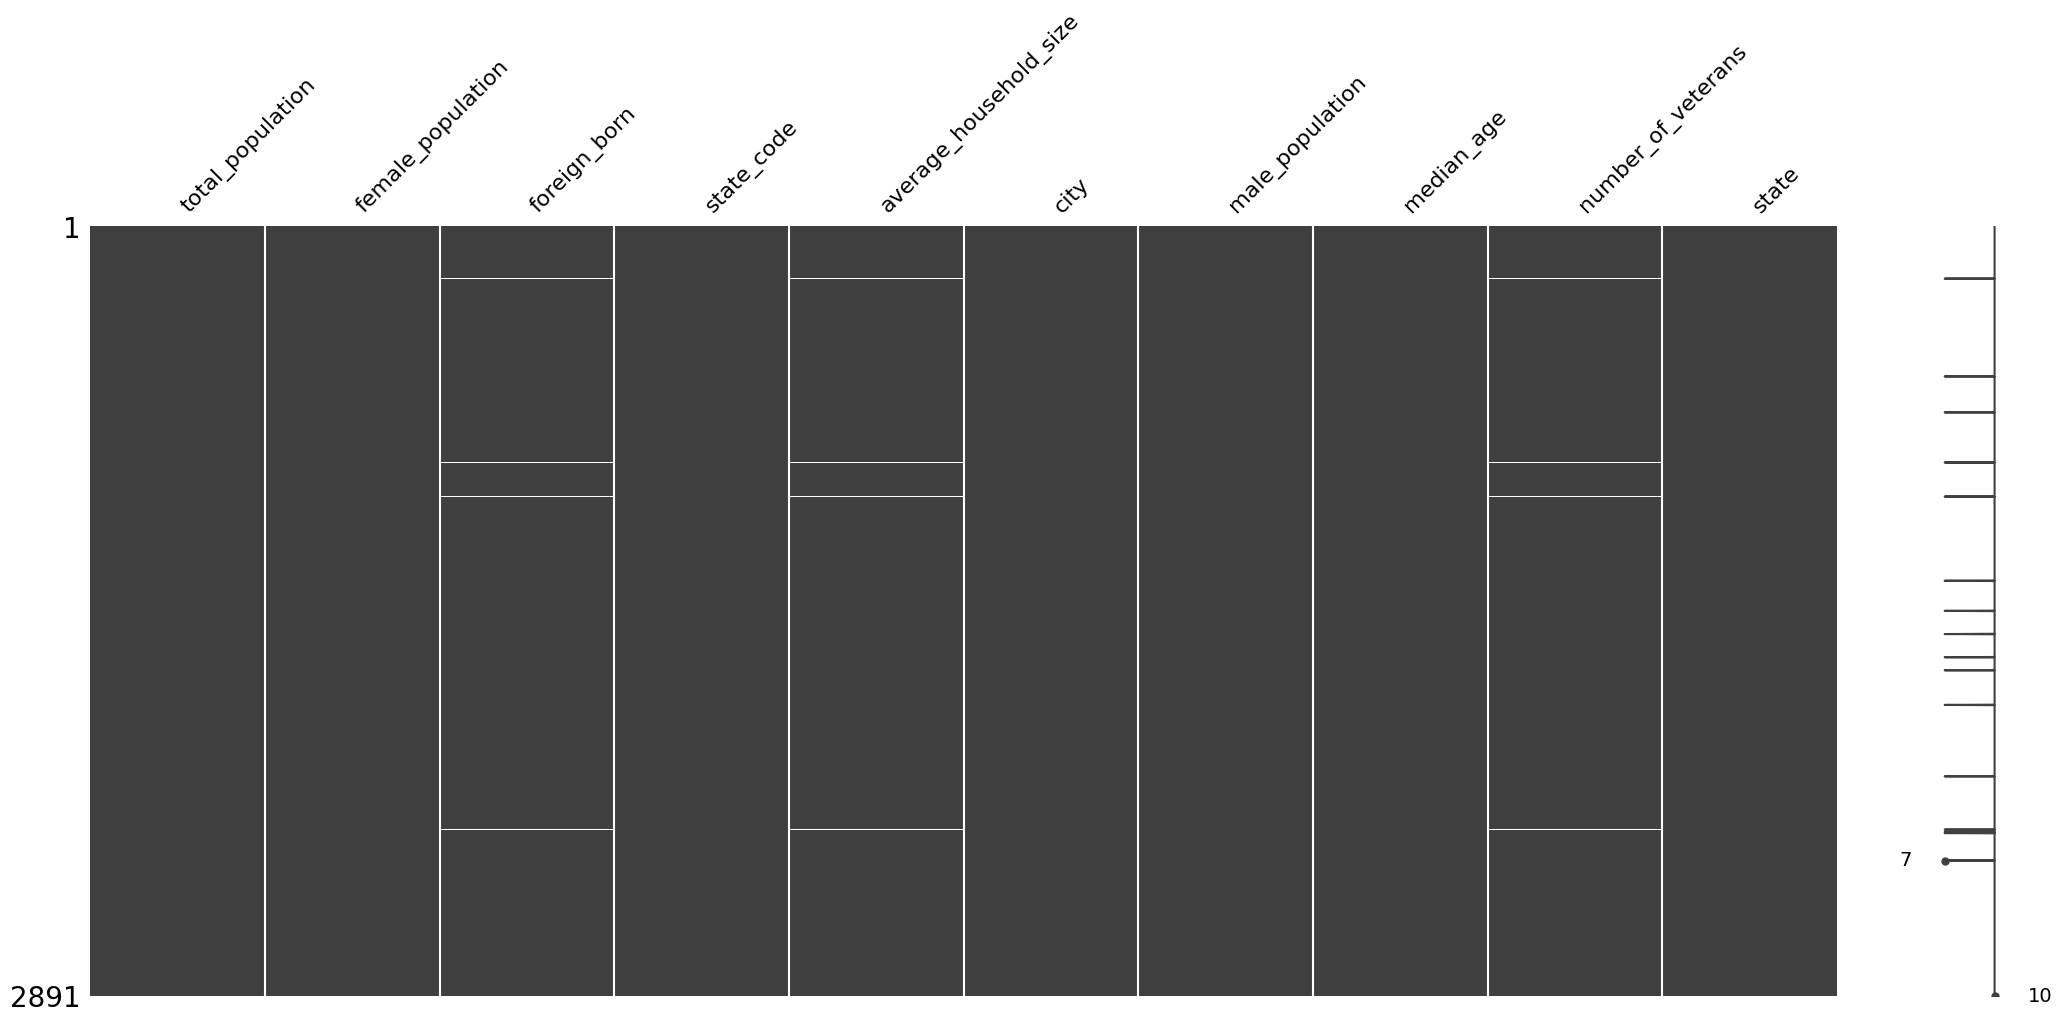

In [ ]:
#COMPLETENESS: Visualizing Missing data from dataframe.
msno.matrix(US_Cities)
plt.show()

In [ ]:
US_Cities_cleansed.info()

In [ ]:
#Makeing all string objects lower case.
for col in US_Cities_cleansed:
  if US_Cities_cleansed[col].dtype == 'object':
    US_Cities_cleansed[col] = US_Cities[col].str.lower()

<ipython-input-220-6faedd6697e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Cities_cleansed[col] = US_Cities[col].str.lower()


In [ ]:
#MERGING: Joining the pizza_cleansed dataframe with the CO_Cities_Cleansed dataframe.
US_Pizza_Cities = pizza_cleansed.merge(US_Cities_cleansed, on=['city', 'state_code'], how='inner')

In [ ]:
US_Pizza_Cities.shape

(5240, 21)

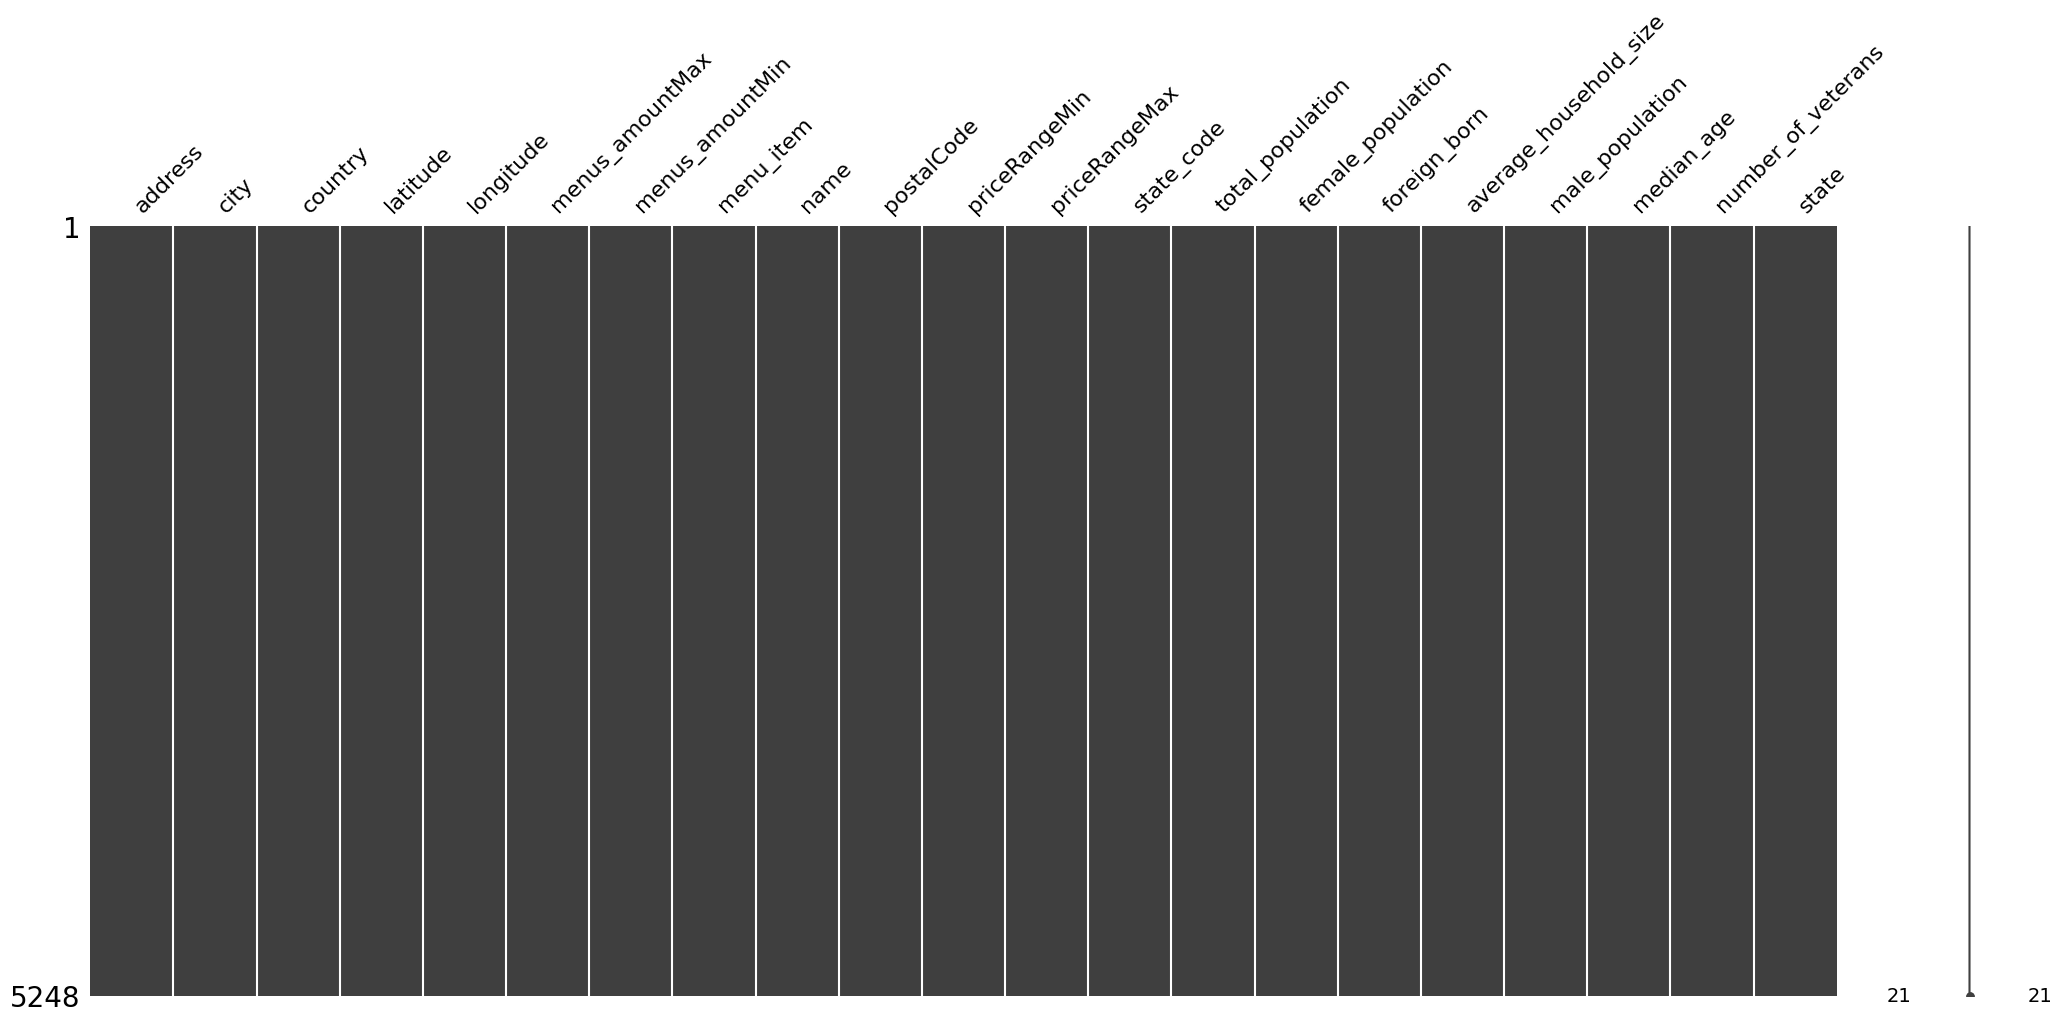

In [ ]:
#Completeness of Combined Dataframe.
msno.matrix(US_Pizza_Cities)
plt.show()

In [ ]:
US_Pizza_Cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5248 entries, 0 to 5247
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 5248 non-null   object 
 1   city                    5248 non-null   object 
 2   country                 5248 non-null   object 
 3   latitude                5248 non-null   float64
 4   longitude               5248 non-null   float64
 5   menus_amountMax         5248 non-null   float64
 6   menus_amountMin         5248 non-null   float64
 7   menu_item               5248 non-null   object 
 8   name                    5248 non-null   object 
 9   postalCode              5248 non-null   object 
 10  priceRangeMin           5248 non-null   int64  
 11  priceRangeMax           5248 non-null   int64  
 12  state_code              5248 non-null   object 
 13  total_population        5248 non-null   int64  
 14  female_population       5248 non-null   

In [ ]:
US_Pizza_Cities.describe()

latitude    longitude  menus_amountMax  menus_amountMin  \
count  5248.000000  5248.000000      5248.000000      5248.000000   
mean     37.829959   -94.721237        13.726471        13.230389   
std       4.935677    17.977591         6.762965         6.509323   
min      25.656882  -149.894053         0.000000         0.000000   
25%      33.883979  -115.124244         8.950000         8.500000   
50%      39.231333   -87.693446        13.950000        13.000000   
75%      40.786215   -78.870174        17.950000        16.960000   
max      61.174665   -73.248800        49.990000        49.990000   

       priceRangeMin  priceRangeMax  total_population  female_population  \
count    5248.000000    5248.000000      5.248000e+03       5.248000e+03   
mean        5.804878      28.432355      1.633480e+06       8.462989e+05   
std        10.631178       6.592497      2.738847e+06       1.430729e+06   
min         0.000000       7.000000      6.321500e+04       2.734800e+04   
25%         0.000000      25.000000      1.605140e+05       8.158200e+04   
50%         0.000000      25.000000      3.896170e+05       2.016230e+05   
75%         1.000000      25.000000      1.300082e+06       6.610630e+05   
max        40.000000      55.000000      8.550405e+06       4.468707e+06   

       foreign_born  average_household_size  male_population   median_age  \
count  5.248000e+03             5248.000000     5.248000e+03  5248.000000   
mean   5.304848e+05                2.574971     7.871815e+05    35.258175   
std    1.051138e+06                0.308670     1.308259e+06     3.556208   
min    1.062000e+03                2.000000     2.928100e+04    23.500000   
25%    2.180200e+04                2.370000     7.893200e+04    33.100000   
50%    5.651400e+04                2.550000     1.910600e+05    35.000000   
75%    2.080460e+05                2.680000     6.390190e+05    36.000000   
max    3.212500e+06                4.980000     4.081698e+06    47.900000   

       number_of_veterans  
count         5248.000000  
mean         41575.092988  
std          49559.263019  
min           1066.000000  
25%           7426.000000  
50%          18051.000000  
75%          61995.000000  
max         156961.000000

In [ ]:
#Looking at occurence of restaurants.
US_Pizza_Cities.name.value_counts(normalize=True)

papa murphys                           0.048780
california pizza kitchen               0.041540
papa johns pizza                       0.019627
pirates pizza                          0.010480
olympia pizza and spaghetti house      0.010290
                                         ...   
romans pizzeria                        0.000191
natys pizza                            0.000191
beggers pizza                          0.000191
primos chicago pizza pasta and subs    0.000191
slice of life pizzeria                 0.000191
Name: name, Length: 919, dtype: float64

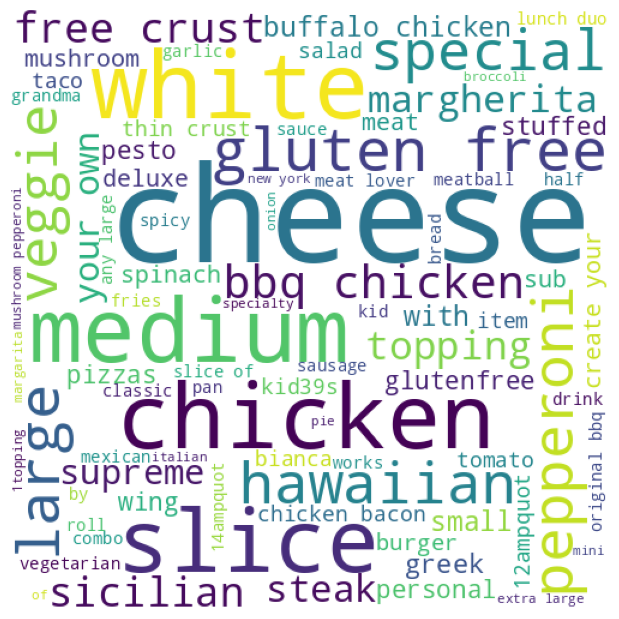

In [ ]:
# Python program to generate WordCloud - Common Words surrounding menu items.

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(['and', 'pizza', 'pizzas' 'pizzeria', 'inch', 'the', 'baking', 'required', 'take','n', 'bake'])

# iterate through the csv file
for val in US_Pizza_Cities.menu_item:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
#Creating menu_item category to match similiar words.
!pip install fuzzywuzzy python-Levenshtein
from fuzzywuzzy import process

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.9 MB/s eta 0:00:00


In [ ]:
#Extracting most prevalent word in menu_item to see popularity.
def categorize_word(word, choices, threshold=80):
  best_match = process.extractOne(word, choices)
  if best_match[1] >= threshold:
    return best_match[0]
    return word

In [ ]:
base_words = ['cheese', 'chicken', 'hawaiian', 'margherita', 'special', 'sicilian', 'gluten', 'veggie', 'white', 'pepperoni', 'buffalo', 'supreme', 'create', 'steak']

In [ ]:
US_Pizza_Cities['new_menu_category'] = US_Pizza_Cities['menu_item'].apply(categorize_word, choices=base_words)

In [ ]:
#Converting new category field into a cateogry data type.
US_Pizza_Cities['new_menu_category'] = US_Pizza_Cities['new_menu_category'].astype('object')

In [ ]:
#Counting prevanlence of new New_Menu_Category
New_Menu_Category_Counts = US_Pizza_Cities.new_menu_category.value_counts(normalize=True)
New_Menu_Category_Counts

cheese        0.240286
chicken       0.226440
white         0.075927
pepperoni     0.075033
special       0.067887
hawaiian      0.062528
veggie        0.062081
margherita    0.043323
sicilian      0.040197
steak         0.029477
gluten        0.029031
supreme       0.027244
create        0.013399
buffalo       0.007146
Name: new_menu_category, dtype: float64

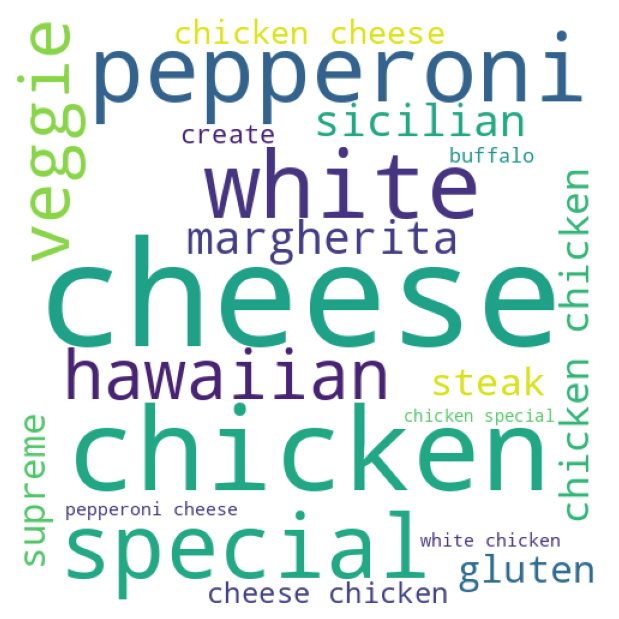

In [ ]:
# Python program to generate WordCloud - Common Words surrounding menu items.

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(['none'])

# iterate through the csv file
for val in US_Pizza_Cities.new_menu_category:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

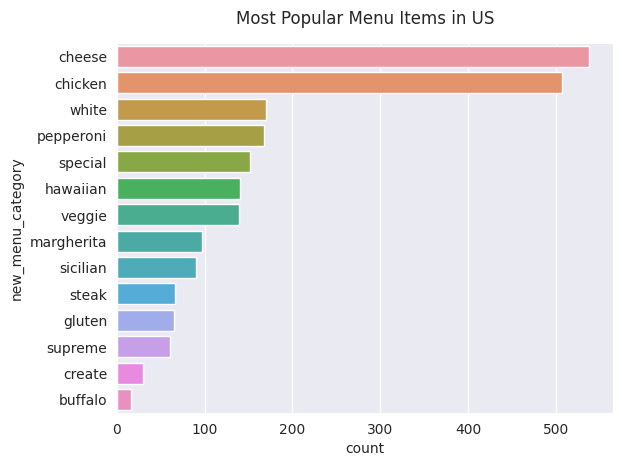

In [ ]:
#Countplot of most common menu_item words.
sns.set_style('darkgrid')
menu_cat_fig = sns.countplot(y="new_menu_category", data=US_Pizza_Cities, order= US_Pizza_Cities["new_menu_category"].value_counts().index)
menu_cat_fig.set_title("Most Popular Menu Items in US", y=1.03)
plt.show()

In [ ]:
#Combining similiar white sauce pizza types. SAVE THIS CODE IF NEED TO CREATE GROUPINGS OF ITEMS FOR CO.
#white_sauce = ["bianco", "blanco", "alfredo", "white"]
#CO_Pizza_Cities.loc[CO_Pizza_Cities["new_menu_category"].isin(white_sauce), "new_menu_category"] = "white_sauce"

In [ ]:
#Y Profiler
#profile = ProfileReport(US_Pizza_Cities, title="Profiling Report")
#profile

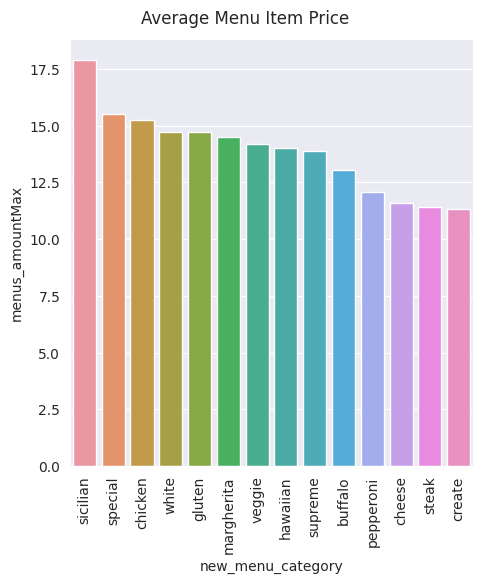

In [ ]:
#Average Prices for most popular US Menu item.
sns.set_style('darkgrid')
order = US_Pizza_Cities.groupby('new_menu_category')['menus_amountMax'].mean().sort_values().index
reversed_order= order[::-1]
price = sns.catplot(x="new_menu_category", y="menus_amountMax", data=US_Pizza_Cities, kind="bar", errorbar=None, order=reversed_order)
price.fig.suptitle("Average Menu Item Price", y=1.03)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Looking at Just Colorado
CO_Pizza_Cities = US_Pizza_Cities.loc[US_Pizza_Cities['state_code'] == 'co']

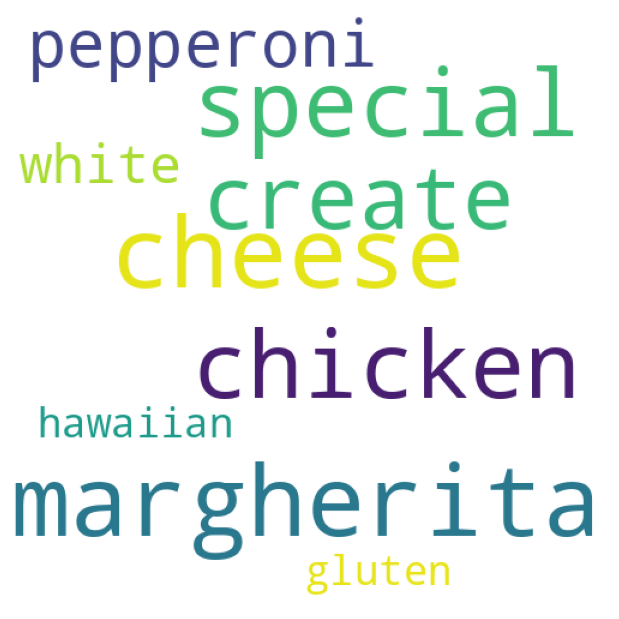

In [ ]:
#CO: Common Words surrounding menu items.

comment_words = ''
stopwords = set(['none'])

# iterate through the csv file
for val in CO_Pizza_Cities.new_menu_category:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

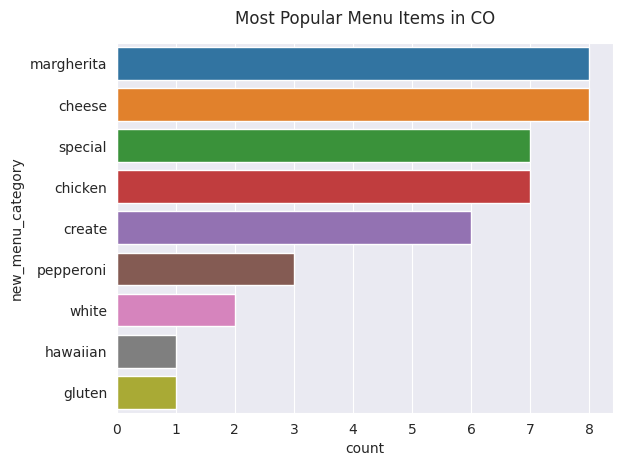

In [ ]:
#Countplot of most common menu_item words for CO.
sns.set_style('darkgrid')
menu_cat_fig = sns.countplot(y="new_menu_category", data=CO_Pizza_Cities, order= CO_Pizza_Cities["new_menu_category"].value_counts().index)
menu_cat_fig.set_title("Most Popular Menu Items in CO", y=1.03)
plt.show()

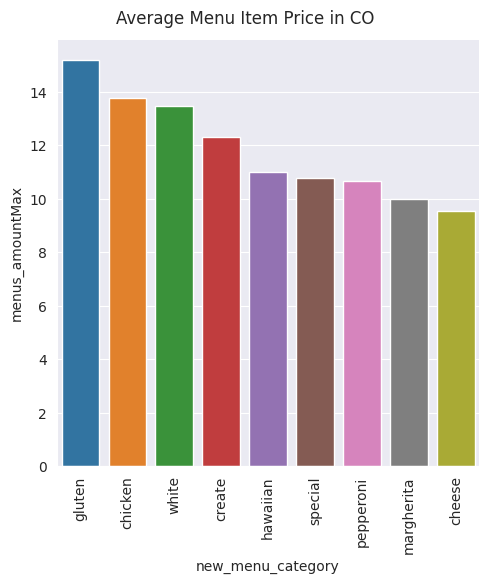

In [ ]:
#Average Prices for most popular CO Menu item.
sns.set_style('darkgrid')
order = CO_Pizza_Cities.groupby('new_menu_category')['menus_amountMax'].mean().sort_values().index
reversed_order= order[::-1]
price = sns.catplot(x="new_menu_category", y="menus_amountMax", data=CO_Pizza_Cities, kind="bar", errorbar=None, order=reversed_order)
price.fig.suptitle("Average Menu Item Price in CO", y=1.03)
plt.xticks(rotation=90)
plt.show()

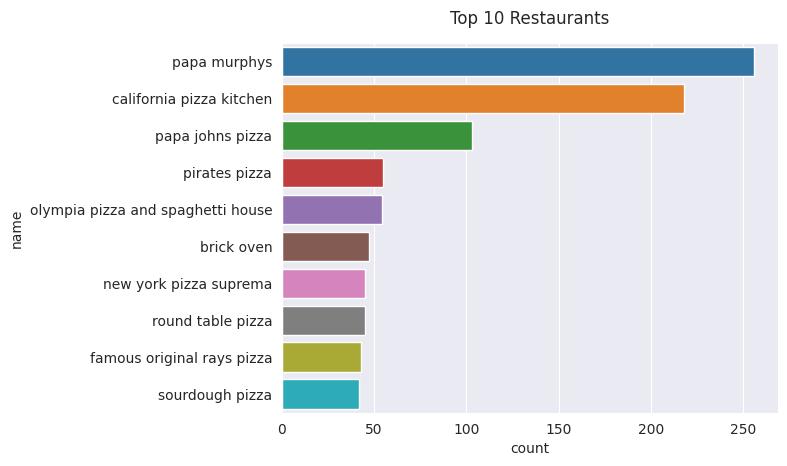

In [ ]:
#Countplot of most common restaurants.
top10 = US_Pizza_Cities['name'].value_counts().index[:10]
sns.set_style('darkgrid')
menu_cat_fig = sns.countplot(y="name", data=US_Pizza_Cities, order=top10)
menu_cat_fig.set_title("Top 10 Restaurants", y=1.03)
plt.show()

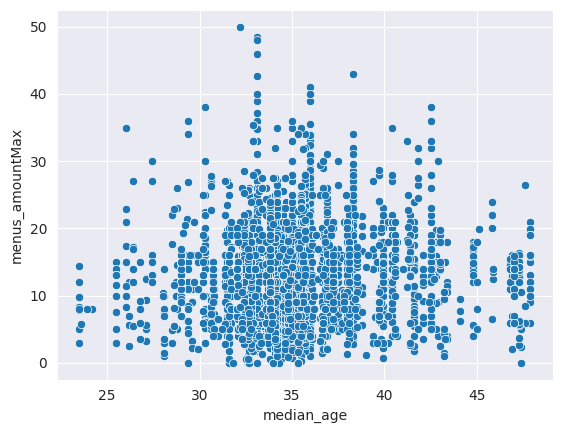

In [ ]:
#Median age and menu price comparison.
sns.scatterplot(x='median_age', y='menus_amountMax', data=US_Pizza_Cities)
plt.show()

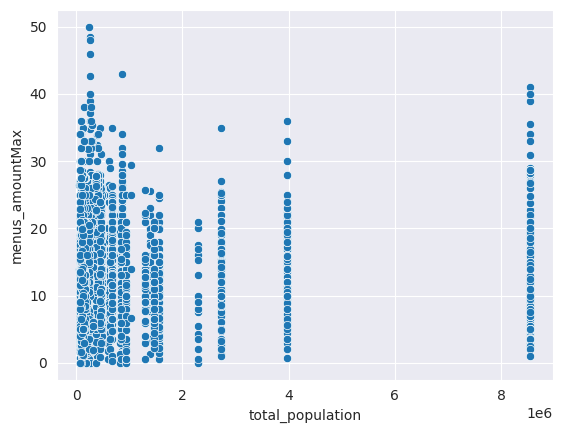

In [ ]:
#Total Population and menu price comparison.
sns.scatterplot(x='total_population', y='menus_amountMax', data=US_Pizza_Cities)
plt.show()

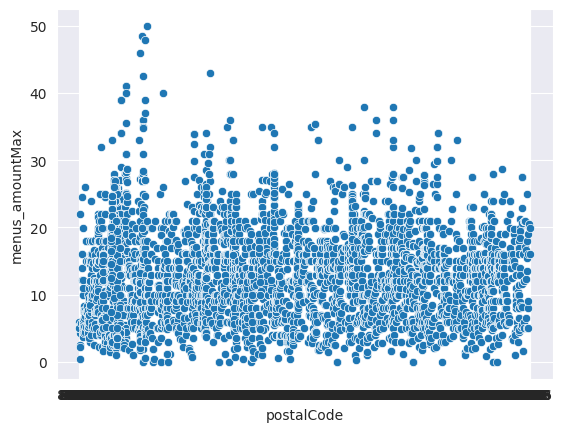

In [ ]:
#Postal Code and menu price comparison.
sns.scatterplot(x='postalCode', y='menus_amountMax', data=US_Pizza_Cities)
plt.show()

In [ ]:
US_Pizza_Cities['postalCode'] = US_Pizza_Cities['postalCode'].astype(str)
US_Pizza_Cities['postalCode'] = pd.to_numeric(US_Pizza_Cities['postalCode'], errors='coerce')
US_Pizza_Cities['postalCode'] = US_Pizza_Cities['postalCode'].fillna(-1).astype(int)

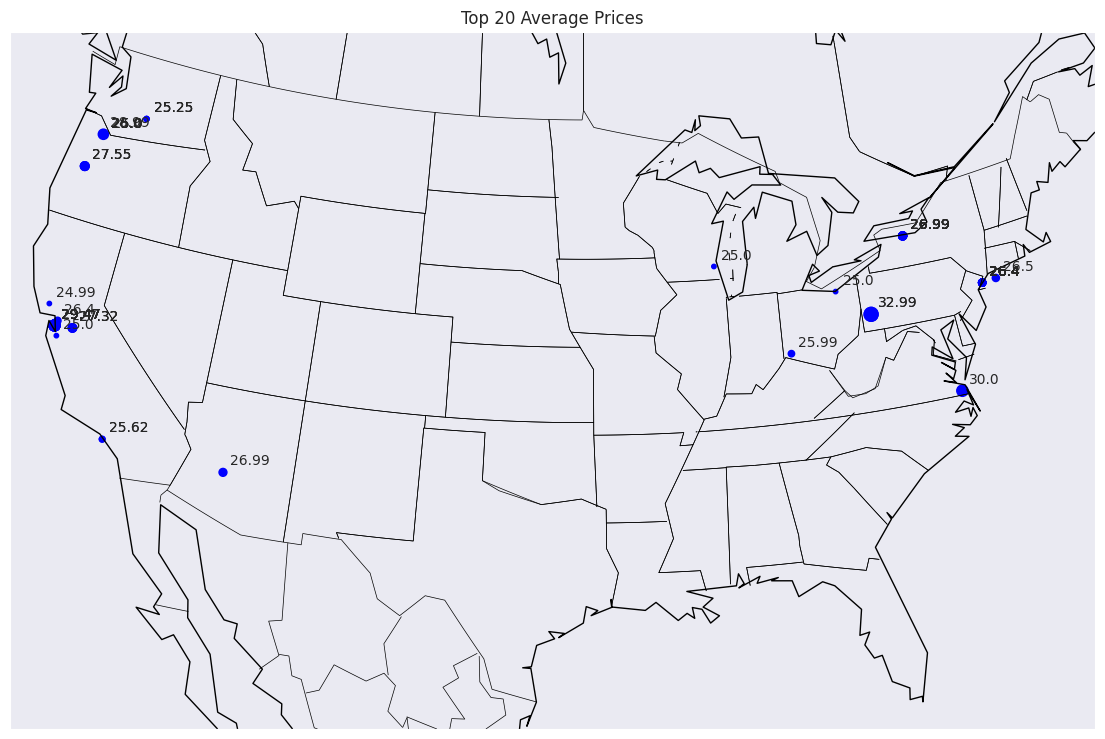

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install basemap
from mpl_toolkits.basemap import Basemap

# Groupby and aggregate
avg_df = US_Pizza_Cities.groupby('postalCode')['menus_amountMax'].mean().reset_index()

# Filter top 20
top20 = avg_df.nlargest(20, 'menus_amountMax')

# Merge back to regain menus_amountMax column
top20 = pd.merge(US_Pizza_Cities, top20, on='postalCode')

fig = plt.figure(figsize=(14,10))

# Get current axes, and plot on larger size
ax = fig.add_subplot(111)

# Create map
m = Basemap(ax=ax, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# Draw map
m.drawcoastlines()
m.drawstates()
m.drawcountries()

top20['menus_amountMax'] = top20['menus_amountMax_x']
top20['menus_amountMax'] = top20['menus_amountMax_y']

# Normalize sizes from 10-100
sizes = 10 + 90*(top20['menus_amountMax'] - top20['menus_amountMax'].min())/(top20['menus_amountMax'].max() - top20['menus_amountMax'].min())

# Plot top 20 points
m.scatter(top20['longitude'], top20['latitude'], s=sizes, c='blue',
          latlon=True)

# Convert coordinates for annotation
x, y = m(top20['longitude'].values, top20['latitude'].values)

# Add labels
for i, row in top20.iterrows():
    plt.annotate(str(round(row['menus_amountMax'], 2)), (x[i], y[i]),
                 xytext=(5,5), textcoords='offset points')

# Show plot
plt.title('Top 20 Average Prices')
plt.show()

In [ ]:
US_Pizza_Cities.head(5)

address     city country   latitude   longitude  \
0         25 e camelback rd  phoenix      us  33.509266 -112.073044   
1     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
2     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
3     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
4  10720 w indian school rd  phoenix      us  33.495299 -112.290831   

   menus_amountMax  menus_amountMin                            menu_item  \
0             6.00             6.00                         pizza cookie   
1             5.50             5.50                  meatball pizza roll   
2             5.50             5.50    green pepper and onion pizza roll   
3             4.25             4.25  pizza fries with pepperoni or bacon   
4            21.95            21.95      brothers special sicilian pizza   

               name  postalCode  ...  state_code  total_population  \
0  sauce pizza wine       85012  ...          az           1563001   
1        rays pizza       85027  ...          az           1563001   
2        rays pizza       85027  ...          az           1563001   
3        rays pizza       85027  ...          az           1563001   
4    brothers pizza       85037  ...          az           1563001   

  female_population  foreign_born  average_household_size  male_population  \
0          776168.0      300702.0                    2.89         786833.0   
1          776168.0      300702.0                    2.89         786833.0   
2          776168.0      300702.0                    2.89         786833.0   
3          776168.0      300702.0                    2.89         786833.0   
4          776168.0      300702.0                    2.89         786833.0   

   median_age  number_of_veterans    state  new_menu_category  
0        33.8             72388.0  arizona               None  
1        33.8             72388.0  arizona               None  
2        33.8             72388.0  arizona               None  
3        33.8             72388.0  arizona          pepperoni  
4        33.8             72388.0  arizona            special  

[5 rows x 22 columns]

In [ ]:
#Correlations between all column pairs.
import pandas as pd
from scipy.stats import pearsonr

df = US_Pizza_Cities

num_cols = ['menus_amountMax', 'menus_amountMin', 'priceRangeMin', 'priceRangeMax',
            'total_population', 'female_population', 'foreign_born',
            'average_household_size', 'male_population', 'median_age',
            'number_of_veterans']

corrs = []
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        col1 = num_cols[i]
        col2 = num_cols[j]
        r, p = pearsonr(df[col1], df[col2])
        corrs.append((col1, col2, r))

corrs_df = pd.DataFrame(corrs, columns=['Var1', 'Var2', 'Correlation'])
print(corrs_df.sort_values('Correlation', ascending=False))

                      Var1                    Var2  Correlation
34        total_population       female_population     0.999953
37        total_population         male_population     0.999943
42       female_population         male_population     0.999792
40       female_population            foreign_born     0.995233
35        total_population            foreign_born     0.995156
46            foreign_born         male_population     0.994965
19           priceRangeMin           priceRangeMax     0.984825
53         male_population      number_of_veterans     0.962728
39        total_population      number_of_veterans     0.961800
44       female_population      number_of_veterans     0.960856
0          menus_amountMax         menus_amountMin     0.941903
48            foreign_born      number_of_veterans     0.938288
14         menus_amountMin            foreign_born     0.194675
16         menus_amountMin         male_population     0.186274
12         menus_amountMin        total_

In [ ]:
# Calculate frequency of each category by city
menu_counts = US_Pizza_Cities.groupby(['city', 'new_menu_category']).size().reset_index(name='count')

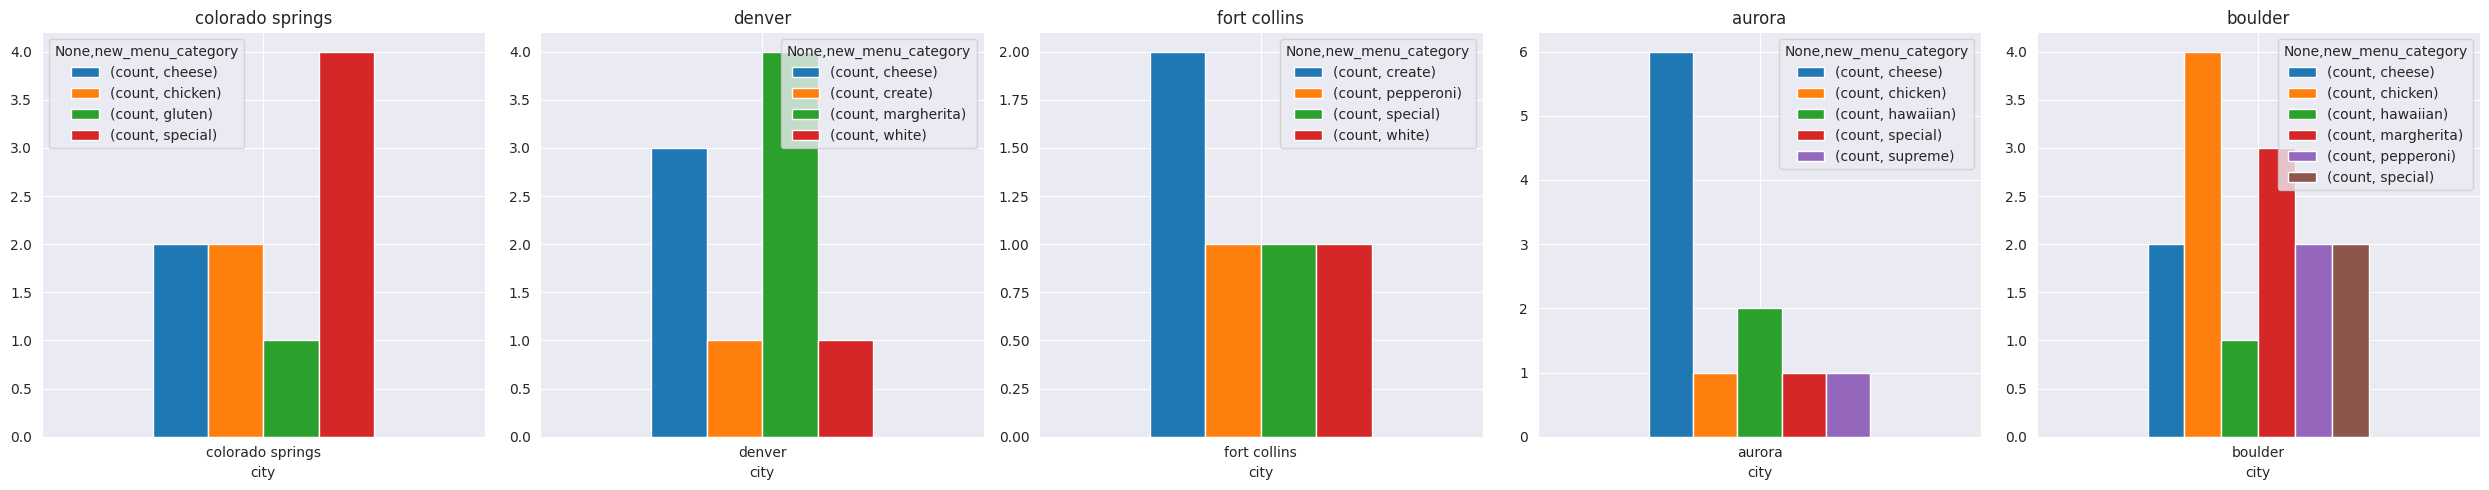

In [ ]:
#Create a function to see popular Pizza Menu Items for five cities.
def plot_city_counts(cities):

    num_plots = len(cities)

    # Create figure and axes
    fig, axs = plt.subplots(ncols=num_plots, figsize=(5*num_plots, 5))

    for i, city in enumerate(cities):

        # Filter data
        city_counts = menu_counts[menu_counts['city'] == city]

        # Plot city as bar chart
        city_counts.set_index(['city','new_menu_category']).unstack().plot(kind='bar', ax=axs[i], rot=0)
        axs[i].set_title(city)

    plt.tight_layout()
    plt.show()

# Example
plot_city_counts(['colorado springs', 'denver', 'fort collins', 'aurora', 'boulder'])

In [ ]:
#Pivot Data of menu_counts index on city to see which menu item combinations have a correlation.
pivot = menu_counts.pivot(index='city', columns='new_menu_category', values='count')

<Axes: xlabel='new_menu_category', ylabel='new_menu_category'>

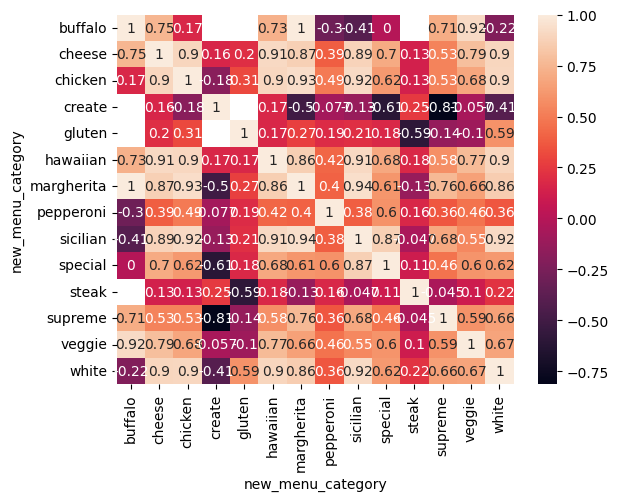

In [ ]:
#Heatmap to determine correlations of popular menu item counts grouped by city.
sns.heatmap(pivot.corr(), annot=True)

In [ ]:
pivot.corr()

new_menu_category   buffalo    cheese   chicken    create    gluten  hawaiian  \
new_menu_category                                                               
buffalo            1.000000  0.747401  0.167162       NaN       NaN  0.729397   
cheese             0.747401  1.000000  0.897395  0.163230  0.200112  0.914321   
chicken            0.167162  0.897395  1.000000 -0.184427  0.306137  0.901667   
create                  NaN  0.163230 -0.184427  1.000000       NaN  0.165872   
gluten                  NaN  0.200112  0.306137       NaN  1.000000  0.167798   
hawaiian           0.729397  0.914321  0.901667  0.165872  0.167798  1.000000   
margherita         1.000000  0.869283  0.930388 -0.502519  0.270893  0.861698   
pepperoni         -0.301511  0.386287  0.492666 -0.076614  0.186733  0.415516   
sicilian          -0.408248  0.885510  0.919022 -0.132453  0.211106  0.909428   
special            0.000000  0.697301  0.622191 -0.612372  0.177247  0.681496   
steak                   NaN  0.133921  0.129790  0.250000 -0.592977  0.175464   
supreme            0.707107  0.527868  0.527338 -0.813489 -0.136399  0.577685   
veggie             0.916698  0.791732  0.679191 -0.056888 -0.101710  0.766798   
white             -0.221163  0.896169  0.903586 -0.405554  0.590283  0.897432   

new_menu_category  margherita  pepperoni  sicilian   special     steak  \
new_menu_category                                                        
buffalo              1.000000  -0.301511 -0.408248  0.000000       NaN   
cheese               0.869283   0.386287  0.885510  0.697301  0.133921   
chicken              0.930388   0.492666  0.919022  0.622191  0.129790   
create              -0.502519  -0.076614 -0.132453 -0.612372  0.250000   
gluten               0.270893   0.186733  0.211106  0.177247 -0.592977   
hawaiian             0.861698   0.415516  0.909428  0.681496  0.175464   
margherita           1.000000   0.400668  0.939794  0.606025 -0.131321   
pepperoni            0.400668   1.000000  0.384234  0.596010  0.164400   
sicilian             0.939794   0.384234  1.000000  0.869479 -0.047222   
special              0.606025   0.596010  0.869479  1.000000  0.106499   
steak               -0.131321   0.164400 -0.047222  0.106499  1.000000   
supreme              0.759594   0.355843  0.683772  0.463099 -0.045268   
veggie               0.657066   0.462169  0.550420  0.596377  0.104988   
white                0.856370   0.359156  0.920928  0.621383  0.224580   

new_menu_category   supreme    veggie     white  
new_menu_category                                
buffalo            0.707107  0.916698 -0.221163  
cheese             0.527868  0.791732  0.896169  
chicken            0.527338  0.679191  0.903586  
create            -0.813489 -0.056888 -0.405554  
gluten            -0.136399 -0.101710  0.590283  
hawaiian           0.577685  0.766798  0.897432  
margherita         0.759594  0.657066  0.856370  
pepperoni          0.355843  0.462169  0.359156  
sicilian           0.683772  0.550420  0.920928  
special            0.463099  0.596377  0.621383  
steak             -0.045268  0.104988  0.224580  
supreme            1.000000  0.591256  0.655919  
veggie             0.591256  1.000000  0.669643  
white              0.655919  0.669643  1.000000

In [ ]:
pivot

new_menu_category  buffalo  cheese  chicken  create  gluten  hawaiian  \
city                                                                    
akron                  1.0     NaN      NaN     NaN     1.0       NaN   
alameda                NaN     NaN      NaN     NaN    11.0       NaN   
albany                 1.0     2.0      9.0     NaN     NaN       2.0   
albuquerque            NaN     2.0      3.0     1.0     NaN       NaN   
alexandria             NaN     NaN      2.0     NaN     NaN       NaN   
...                    ...     ...      ...     ...     ...       ...   
wichita                NaN     3.0      2.0     1.0     NaN       1.0   
wilmington             NaN     NaN      NaN     NaN     NaN       NaN   
winston-salem          NaN     2.0      NaN     NaN     NaN       NaN   
yakima                 NaN     NaN      1.0     NaN     NaN       NaN   
yonkers                NaN     1.0      4.0     NaN     NaN       1.0   

new_menu_category  margherita  pepperoni  sicilian  special  steak  supreme  \
city                                                                          
akron                     NaN        NaN       NaN      NaN    NaN      NaN   
alameda                   NaN        NaN       NaN      NaN    NaN      1.0   
albany                    NaN        NaN       1.0      NaN    1.0      NaN   
albuquerque               1.0        2.0       NaN      NaN    NaN      NaN   
alexandria                NaN        1.0       NaN      NaN    NaN      NaN   
...                       ...        ...       ...      ...    ...      ...   
wichita                   NaN        NaN       NaN      NaN    NaN      NaN   
wilmington                NaN        NaN       1.0      1.0    NaN      NaN   
winston-salem             NaN        NaN       NaN      NaN    NaN      NaN   
yakima                    NaN        NaN       1.0      NaN    NaN      NaN   
yonkers                   2.0        NaN       NaN      1.0    NaN      NaN   

new_menu_category  veggie  white  
city                              
akron                 NaN    NaN  
alameda               1.0    NaN  
albany                1.0    5.0  
albuquerque           1.0    1.0  
alexandria            NaN    4.0  
...                   ...    ...  
wichita               1.0    NaN  
wilmington            NaN    3.0  
winston-salem         NaN    NaN  
yakima                NaN    NaN  
yonkers               1.0    3.0  

[230 rows x 14 columns]

In [ ]:
#Finding the average price per menu item counts in each city.
mean_price_pivot = df.pivot_table(index='city', columns='new_menu_category', values='menus_amountMax', aggfunc='mean')

In [ ]:
mean_price_pivot

new_menu_category  buffalo  cheese    chicken  create     gluten  hawaiian  \
city                                                                         
akron                 7.49     NaN        NaN     NaN   9.990000       NaN   
alameda                NaN     NaN        NaN     NaN  19.454545       NaN   
albany               11.99  11.705  12.885556     NaN        NaN     13.99   
albuquerque            NaN   5.750  12.983333    9.00        NaN       NaN   
alexandria             NaN     NaN  15.990000     NaN        NaN       NaN   
...                    ...     ...        ...     ...        ...       ...   
wichita                NaN   3.290   9.940000    9.99        NaN     11.99   
wilmington             NaN     NaN        NaN     NaN        NaN       NaN   
winston-salem          NaN  13.250        NaN     NaN        NaN       NaN   
yakima                 NaN     NaN  27.550000     NaN        NaN       NaN   
yonkers                NaN  15.000  17.500000     NaN        NaN     20.00   

new_menu_category  margherita  pepperoni  sicilian  special  steak  supreme  \
city                                                                          
akron                     NaN        NaN       NaN      NaN    NaN      NaN   
alameda                   NaN        NaN       NaN      NaN    NaN     22.0   
albany                    NaN        NaN     11.00      NaN  12.99      NaN   
albuquerque              8.50       7.25       NaN      NaN    NaN      NaN   
alexandria                NaN       6.99       NaN      NaN    NaN      NaN   
...                       ...        ...       ...      ...    ...      ...   
wichita                   NaN        NaN       NaN      NaN    NaN      NaN   
wilmington                NaN        NaN     15.25    12.49    NaN      NaN   
winston-salem             NaN        NaN       NaN      NaN    NaN      NaN   
yakima                    NaN        NaN     27.55      NaN    NaN      NaN   
yonkers                 15.75        NaN       NaN    12.00    NaN      NaN   

new_menu_category  veggie      white  
city                                  
akron                 NaN        NaN  
alameda             22.00        NaN  
albany              16.00  11.156000  
albuquerque         15.00   9.250000  
alexandria            NaN  10.240000  
...                   ...        ...  
wichita              3.85        NaN  
wilmington            NaN  19.656667  
winston-salem         NaN        NaN  
yakima                NaN        NaN  
yonkers             20.00  17.000000  

[230 rows x 14 columns]

<Axes: xlabel='new_menu_category', ylabel='new_menu_category'>

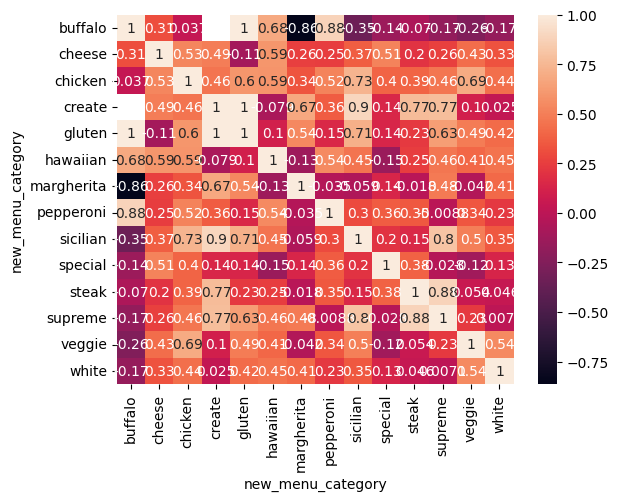

In [ ]:
#Heatmap to determine correlations of popular menu item average price grouped by city.
sns.heatmap(mean_price_pivot.corr(), annot=True)

In [ ]:
mean_price_pivot.corr()

new_menu_category   buffalo    cheese   chicken    create    gluten  hawaiian  \
new_menu_category                                                               
buffalo            1.000000  0.310844  0.036907       NaN  1.000000  0.680138   
cheese             0.310844  1.000000  0.529878  0.492893 -0.105375  0.592890   
chicken            0.036907  0.529878  1.000000  0.457387  0.595719  0.585492   
create                  NaN  0.492893  0.457387  1.000000  1.000000 -0.078937   
gluten             1.000000 -0.105375  0.595719  1.000000  1.000000  0.103222   
hawaiian           0.680138  0.592890  0.585492 -0.078937  0.103222  1.000000   
margherita        -0.864517  0.255673  0.336965  0.672804  0.536155 -0.134186   
pepperoni          0.878897  0.246937  0.517641  0.363390  0.154568  0.544471   
sicilian          -0.346612  0.372787  0.731877  0.896219  0.711546  0.454453   
special           -0.140611  0.512767  0.395189  0.140719  0.140185 -0.148559   
steak             -0.069881  0.199393  0.389129  0.773600  0.234952  0.245697   
supreme           -0.174771  0.262290  0.464786  0.774866  0.630890  0.463901   
veggie            -0.258466  0.425354  0.693239  0.103698  0.485351  0.408741   
white             -0.169054  0.327850  0.438750  0.025148  0.418217  0.451577   

new_menu_category  margherita  pepperoni  sicilian   special     steak  \
new_menu_category                                                        
buffalo             -0.864517   0.878897 -0.346612 -0.140611 -0.069881   
cheese               0.255673   0.246937  0.372787  0.512767  0.199393   
chicken              0.336965   0.517641  0.731877  0.395189  0.389129   
create               0.672804   0.363390  0.896219  0.140719  0.773600   
gluten               0.536155   0.154568  0.711546  0.140185  0.234952   
hawaiian            -0.134186   0.544471  0.454453 -0.148559  0.245697   
margherita           1.000000  -0.034783 -0.058723  0.139206 -0.017712   
pepperoni           -0.034783   1.000000  0.295849  0.359430  0.347385   
sicilian            -0.058723   0.295849  1.000000  0.204477  0.153086   
special              0.139206   0.359430  0.204477  1.000000  0.384909   
steak               -0.017712   0.347385  0.153086  0.384909  1.000000   
supreme              0.476096  -0.008816  0.804393 -0.027828  0.878057   
veggie              -0.042172   0.339879  0.499548 -0.116909  0.054264   
white                0.414034   0.225664  0.349171  0.129653  0.045885   

new_menu_category   supreme    veggie     white  
new_menu_category                                
buffalo           -0.174771 -0.258466 -0.169054  
cheese             0.262290  0.425354  0.327850  
chicken            0.464786  0.693239  0.438750  
create             0.774866  0.103698  0.025148  
gluten             0.630890  0.485351  0.418217  
hawaiian           0.463901  0.408741  0.451577  
margherita         0.476096 -0.042172  0.414034  
pepperoni         -0.008816  0.339879  0.225664  
sicilian           0.804393  0.499548  0.349171  
special           -0.027828 -0.116909  0.129653  
steak              0.878057  0.054264  0.045885  
supreme            1.000000  0.234238  0.007071  
veggie             0.234238  1.000000  0.541535  
white              0.007071  0.541535  1.000000

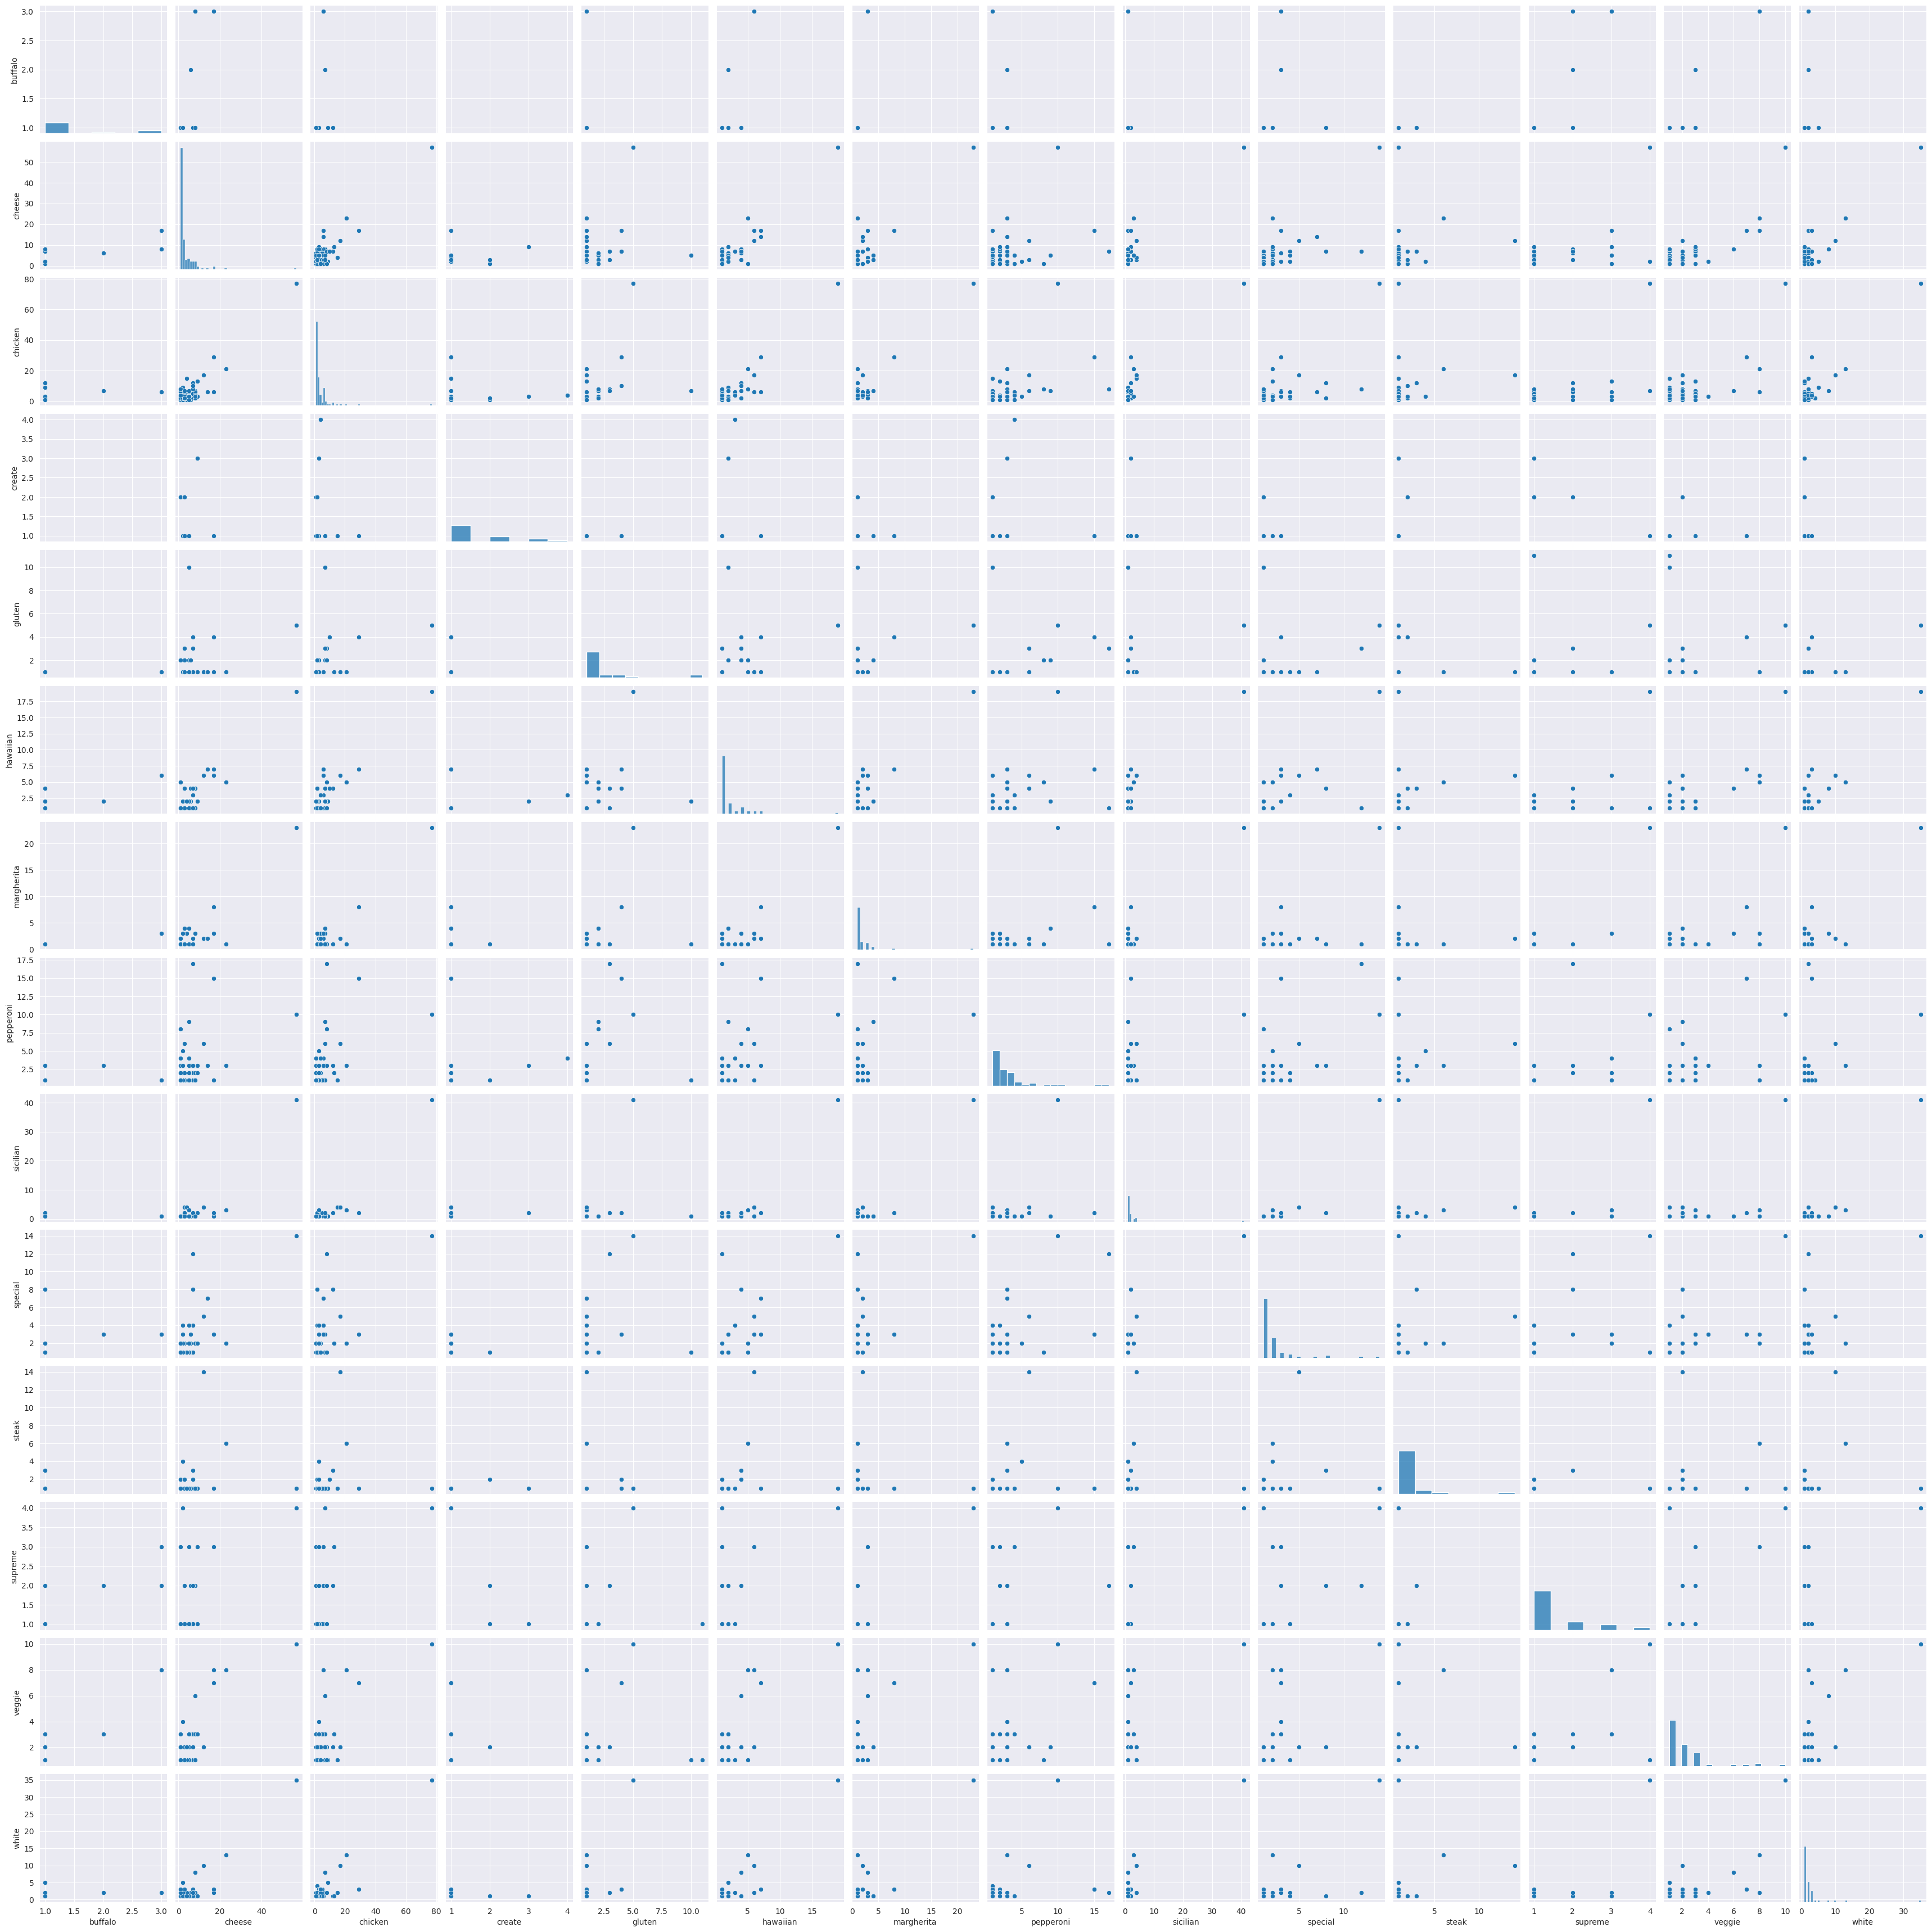

In [ ]:
sns.pairplot(pivot)

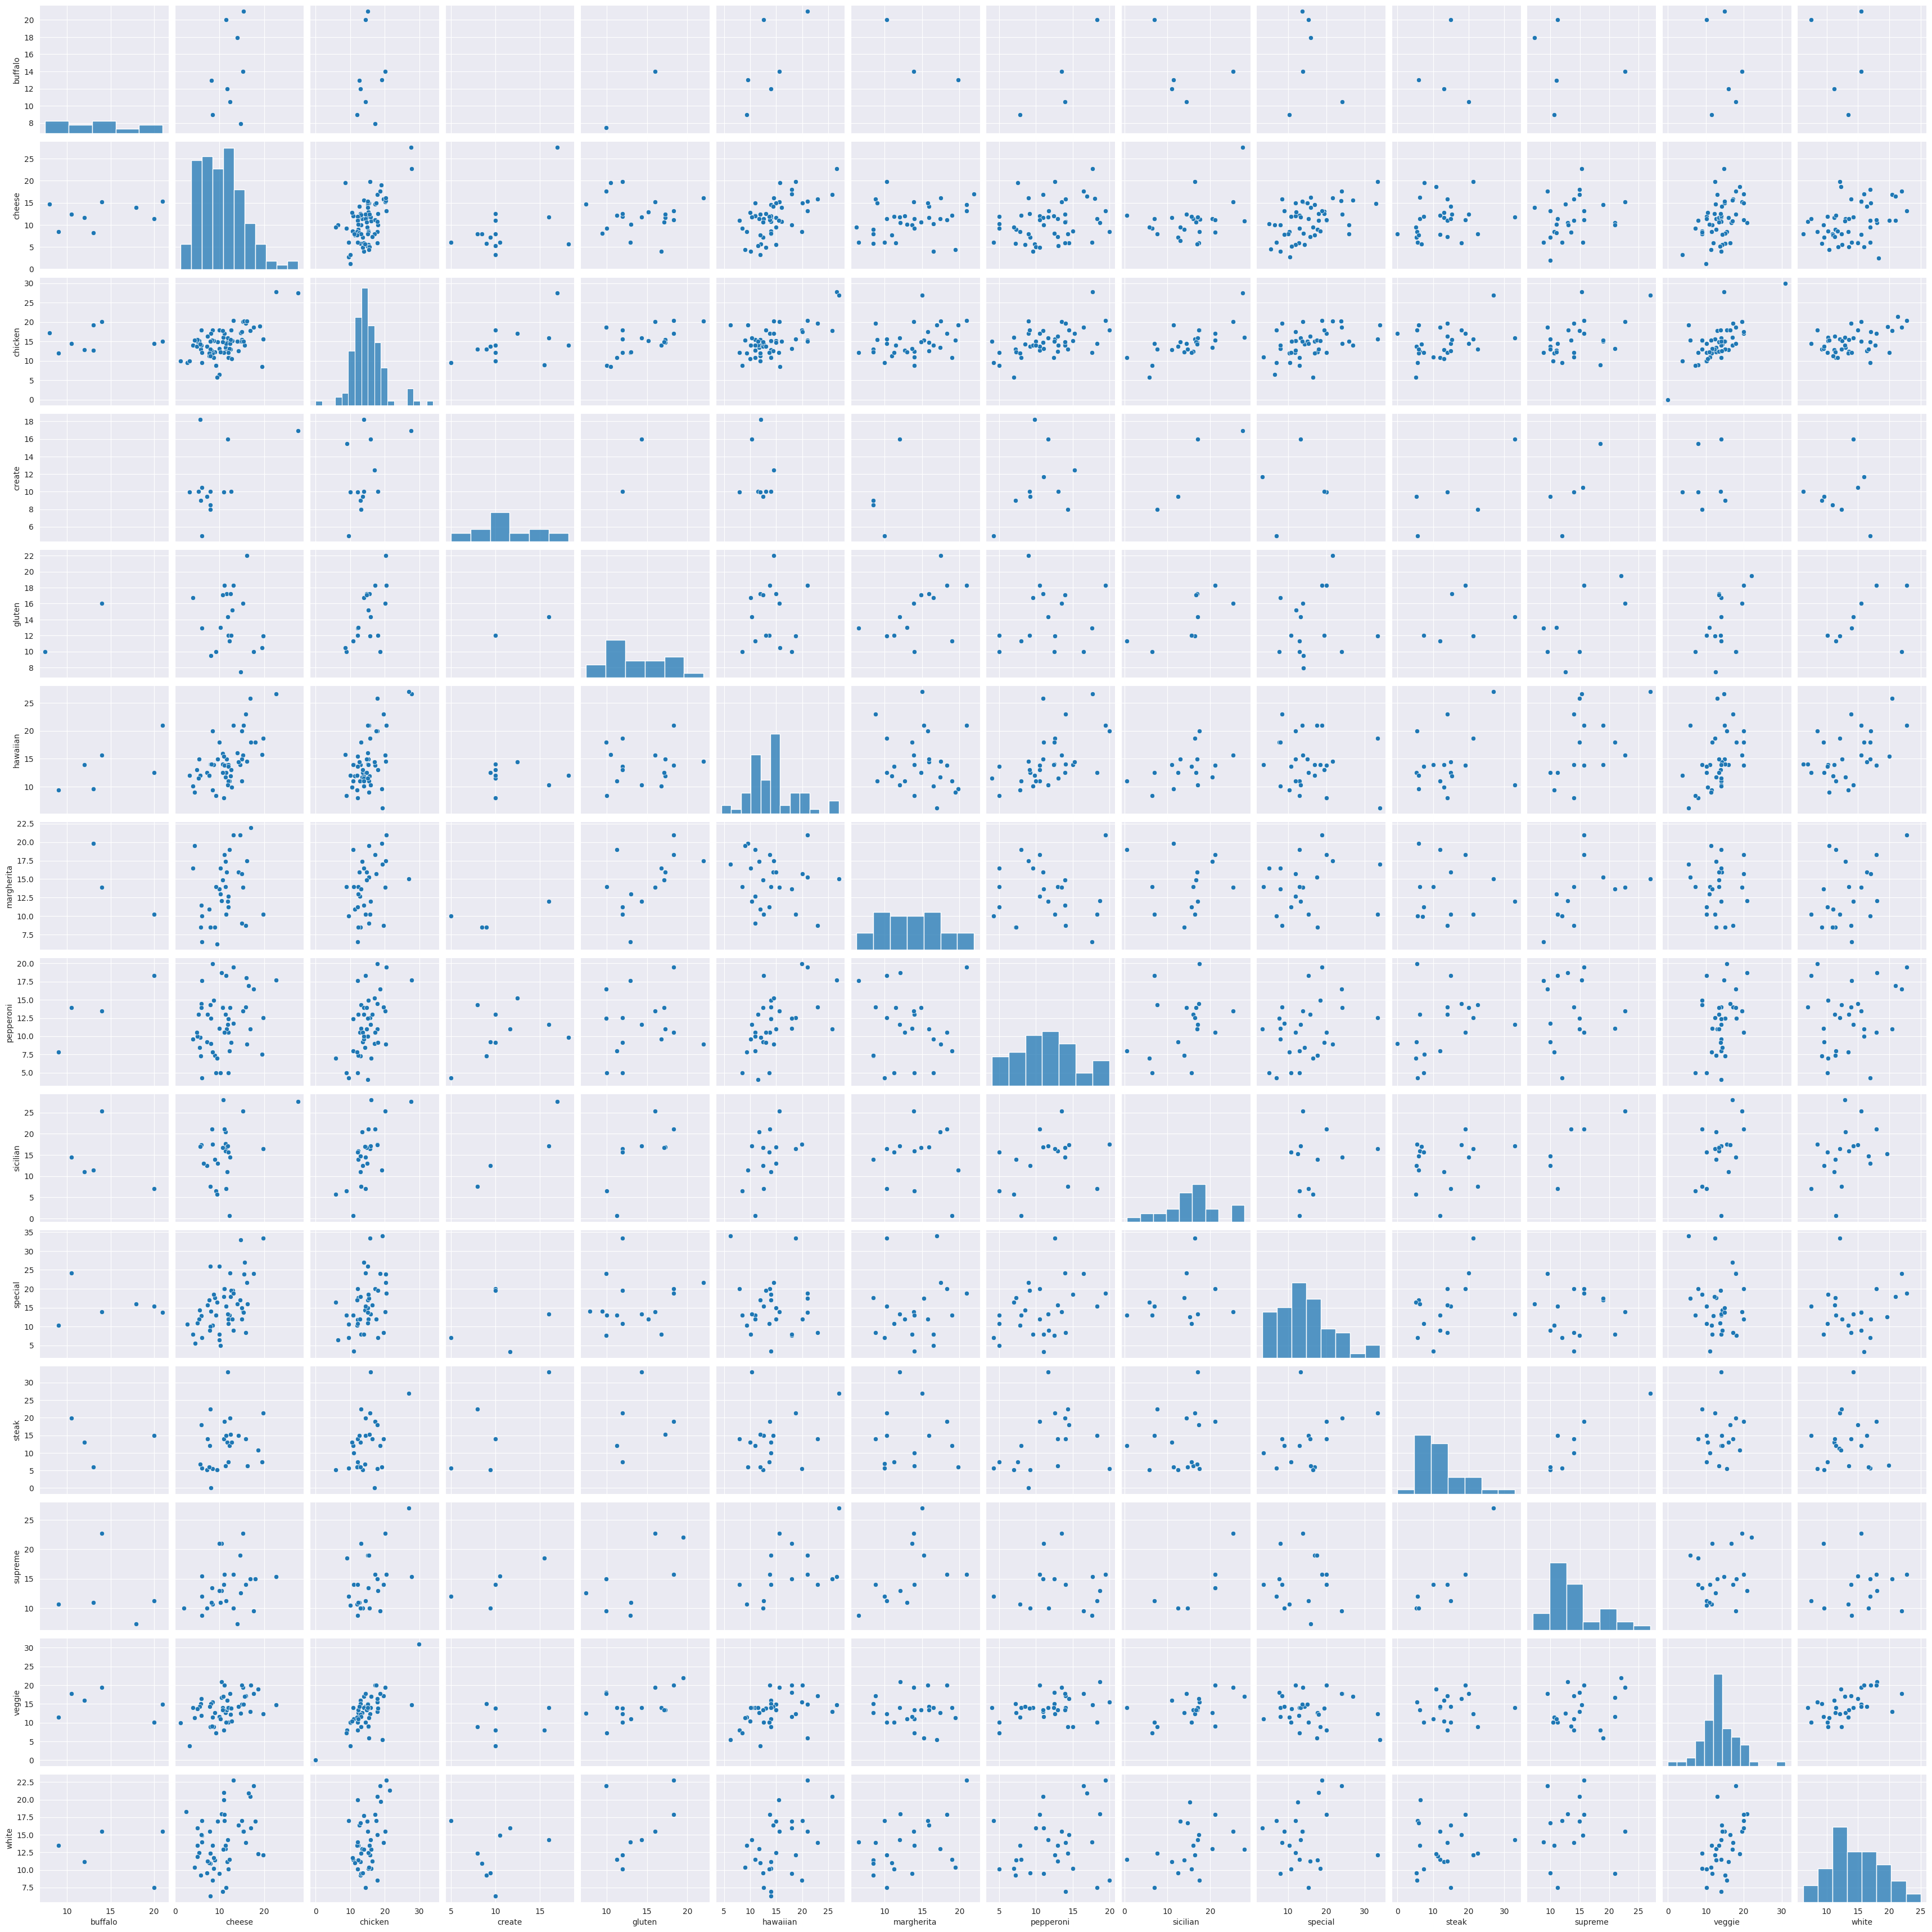

In [ ]:
sns.pairplot(mean_price_pivot)

In [ ]:
#Would like to see correlation between restaurants and menu items.
menu_counts_restaurant = US_Pizza_Cities.groupby(['name', 'new_menu_category']).size().reset_index(name='count')

In [ ]:
restaurant_pivot = menu_counts_restaurant.pivot(index='name', columns='new_menu_category', values='count')

In [ ]:
restaurant_pivot.corr()

new_menu_category   buffalo    cheese   chicken    create        gluten  \
new_menu_category                                                         
buffalo            1.000000  0.100504  0.176048       NaN           NaN   
cheese             0.100504  1.000000  0.838326  0.418770  5.627668e-01   
chicken            0.176048  0.838326  1.000000  0.953491  6.517995e-01   
create                  NaN  0.418770  0.953491  1.000000           NaN   
gluten                  NaN  0.562767  0.651799       NaN  1.000000e+00   
hawaiian                NaN  0.689641  0.868233  0.984613  5.181026e-01   
margherita              NaN  0.940173  0.976285       NaN  9.900393e-01   
pepperoni               NaN  0.939286  0.950962  0.971048  3.771496e-01   
sicilian                NaN  0.598984  0.527967       NaN  3.544588e-01   
special           -0.500000  0.320535  0.079487       NaN  5.362887e-17   
steak                   NaN  0.491362  0.391464       NaN  5.000000e-01   
supreme                 NaN  0.163758  0.159514  1.000000 -3.227486e-01   
veggie                  NaN  0.833019  0.881909  0.748753  3.123962e-01   
white                   NaN  0.232882  0.168271       NaN -5.000000e-01   

new_menu_category  hawaiian  margherita  pepperoni  sicilian       special  \
new_menu_category                                                            
buffalo                 NaN         NaN        NaN       NaN -5.000000e-01   
cheese             0.689641    0.940173   0.939286  0.598984  3.205351e-01   
chicken            0.868233    0.976285   0.950962  0.527967  7.948733e-02   
create             0.984613         NaN   0.971048       NaN           NaN   
gluten             0.518103    0.990039   0.377150  0.354459  5.362887e-17   
hawaiian           1.000000    0.989303   0.865849  0.731399  3.182780e-01   
margherita         0.989303    1.000000   0.999691  0.536576  4.046107e-01   
pepperoni          0.865849    0.999691   1.000000  0.937937  5.829708e-01   
sicilian           0.731399    0.536576   0.937937  1.000000  2.566263e-02   
special            0.318278    0.404611   0.582971  0.025663  1.000000e+00   
steak              0.733333         NaN   1.000000 -0.166667  9.950372e-02   
supreme           -0.161165         NaN   0.266076  1.000000 -2.148574e-01   
veggie             0.775136    0.967155   0.950807  0.548391  4.982729e-02   
white             -0.071429   -0.151330  -0.149071  0.473476 -1.436067e-01   

new_menu_category     steak   supreme    veggie     white  
new_menu_category                                          
buffalo                 NaN       NaN       NaN       NaN  
cheese             0.491362  0.163758  0.833019  0.232882  
chicken            0.391464  0.159514  0.881909  0.168271  
create                  NaN  1.000000  0.748753       NaN  
gluten             0.500000 -0.322749  0.312396 -0.500000  
hawaiian           0.733333 -0.161165  0.775136 -0.071429  
margherita              NaN       NaN  0.967155 -0.151330  
pepperoni          1.000000  0.266076  0.950807 -0.149071  
sicilian          -0.166667  1.000000  0.548391  0.473476  
special            0.099504 -0.214857  0.049827 -0.143607  
steak              1.000000       NaN  0.534522  0.192117  
supreme                 NaN  1.000000  0.704037       NaN  
veggie             0.534522  0.704037  1.000000  0.394921  
white              0.192117       NaN  0.394921  1.000000

<Axes: xlabel='new_menu_category', ylabel='new_menu_category'>

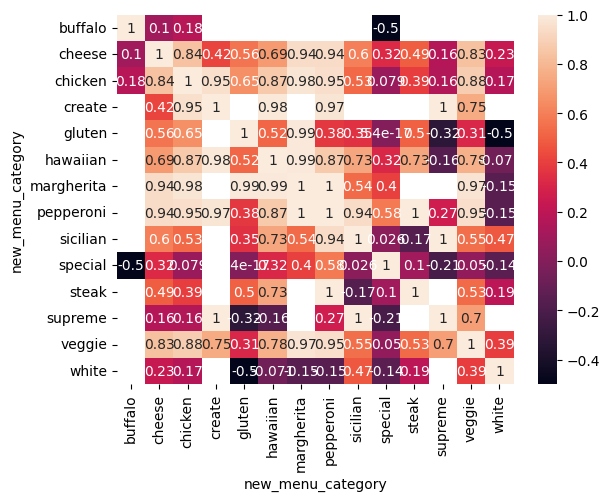

In [ ]:
sns.heatmap(restaurant_pivot.corr(), annot=True)

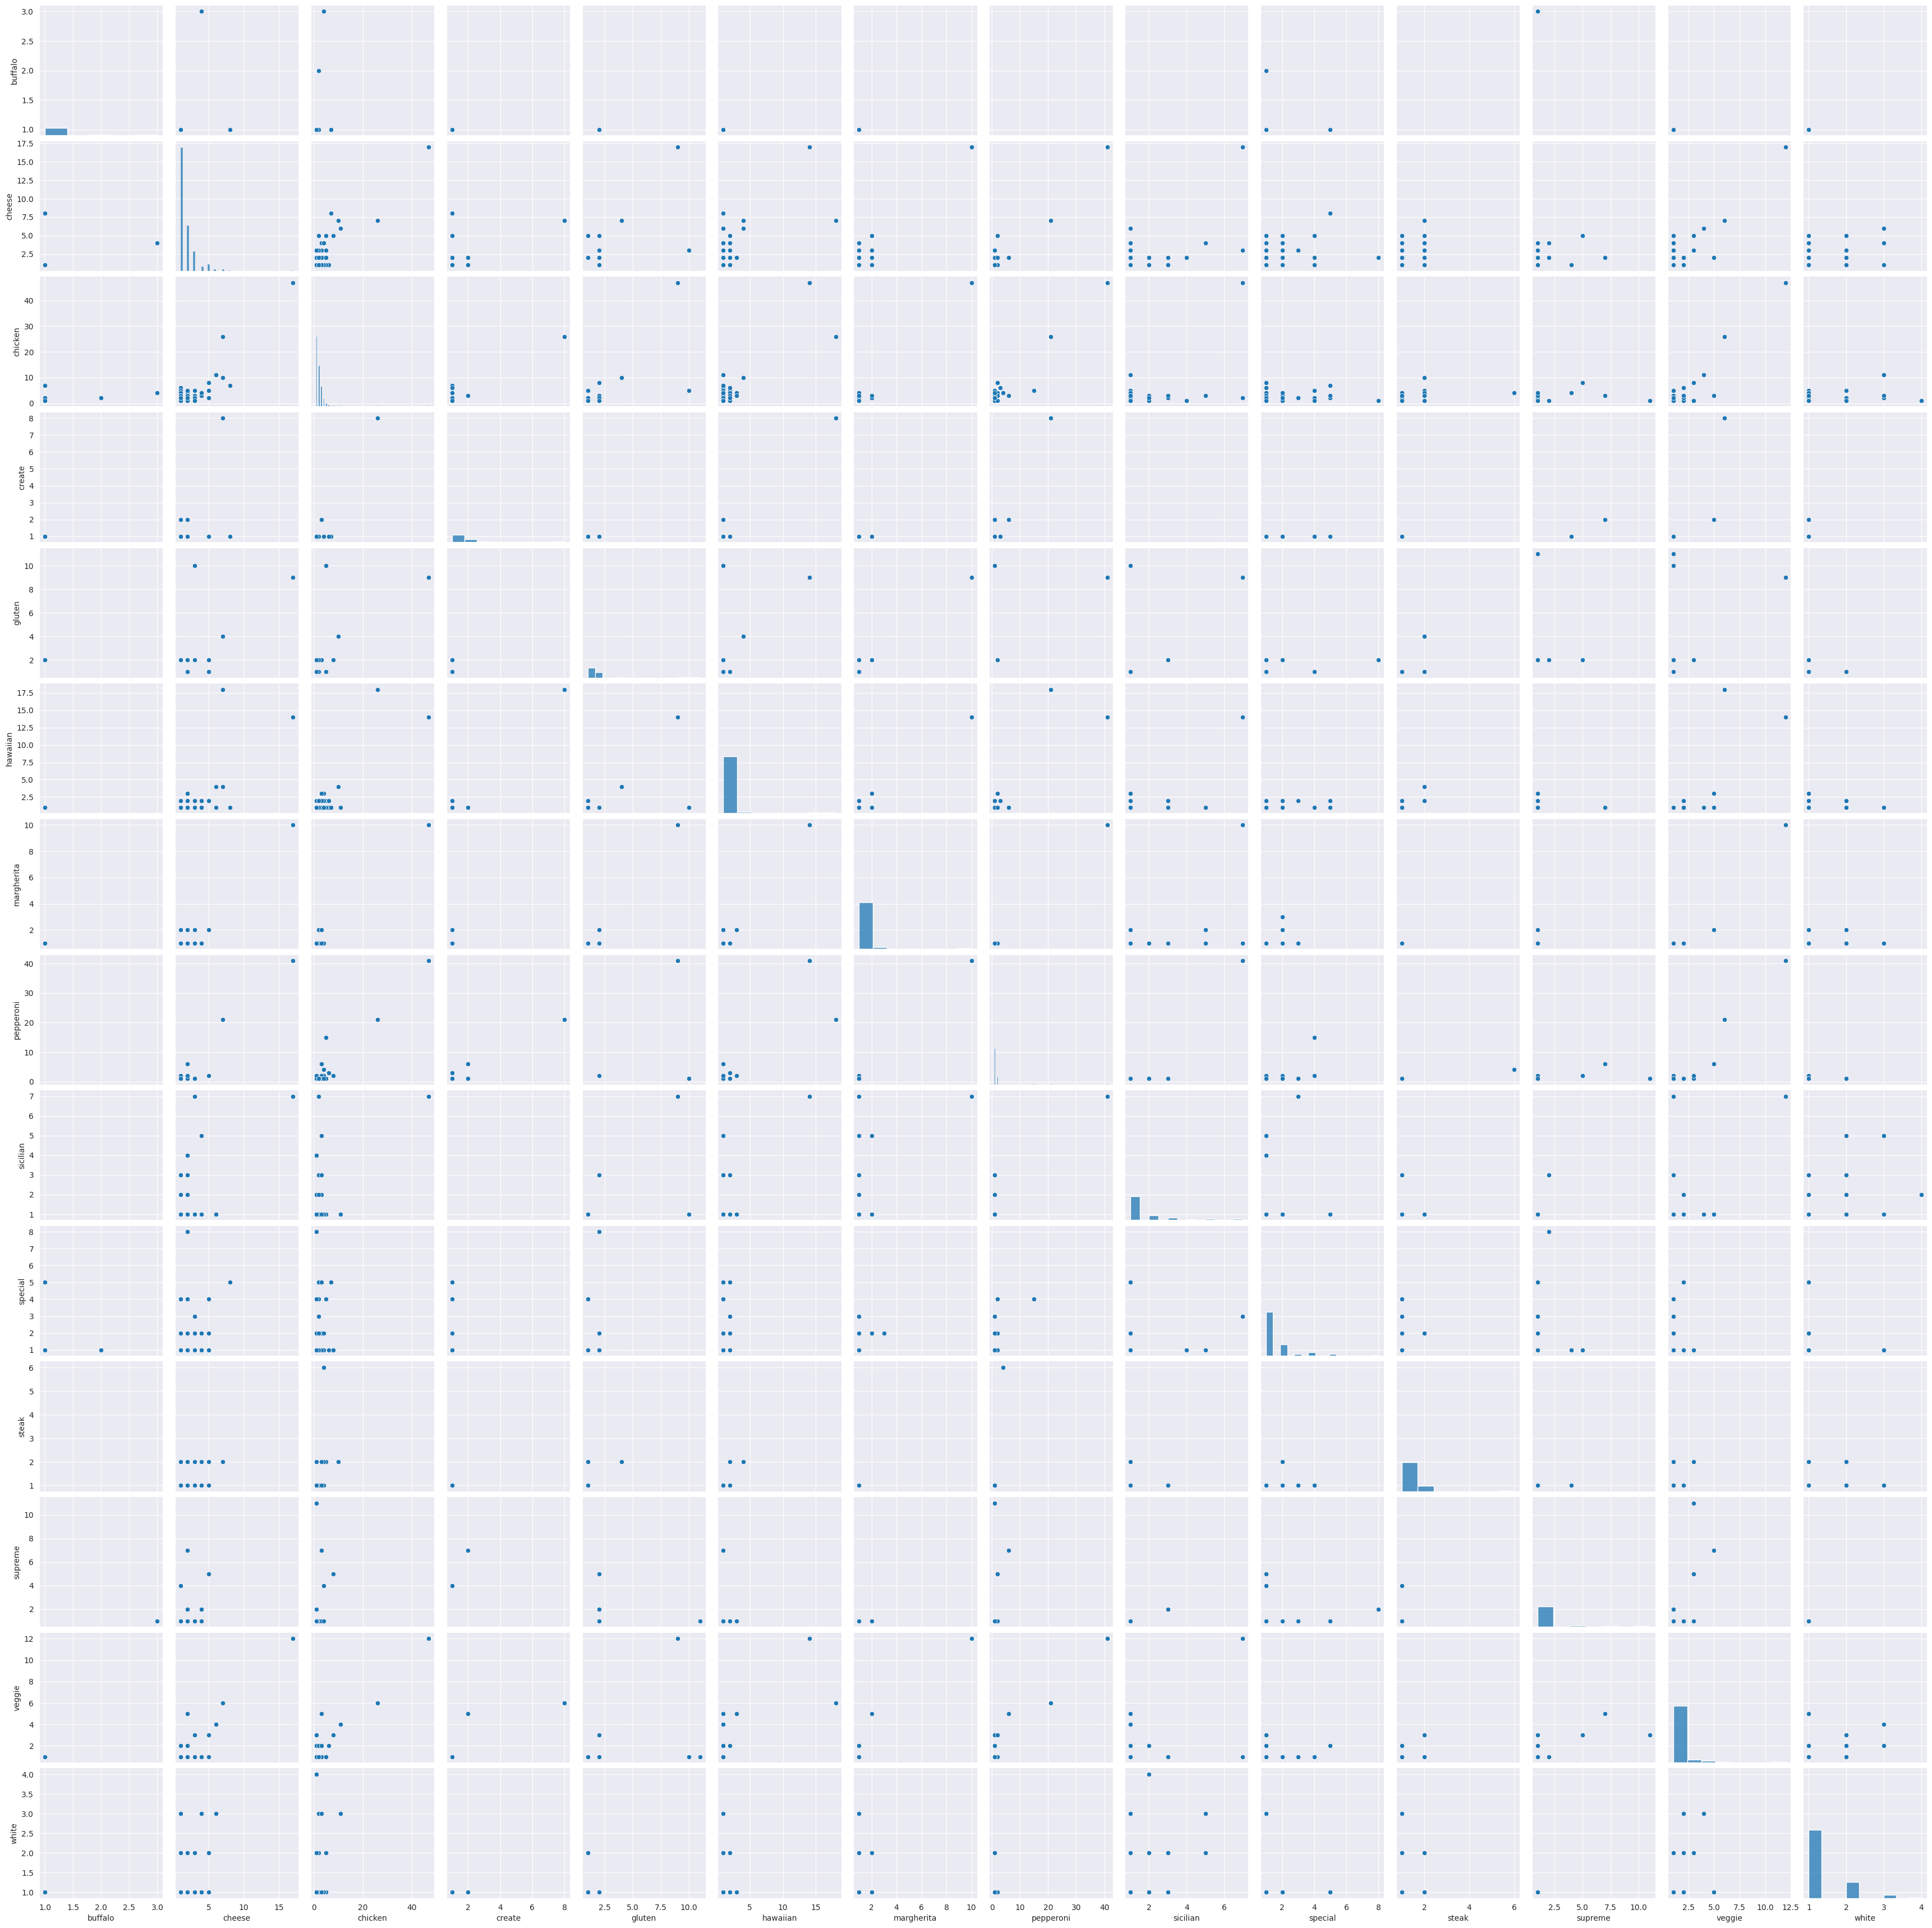

In [ ]:
sns.pairplot(restaurant_pivot)

**EDA Conclusion:** I created a new column called new_menu_category that took the most common words used in the menu to assign a category to each observation for menu items. I see a lot of relationships between new_menu_category grouped by city and grouped by restaurant. Also see relationships pertaining to price grouped by city. Between these three I feel confident that I can recommend which menu items to offer based on a city or even restaurant and then price points of those menu items which does answer the original questions.

In [ ]:
#Creating word_cluster to isolate popular menu items.
import re
from sklearn.cluster import KMeans

# Create a list of stop words to ignore
stopwords = ['pizza', 'pizzas', 'and', 'the', 'baking', '1', '2','free', 'with', 'required', 'of', 's', 'your', 'or', 'item', 'one', '12ampquot', '14ampquot', '16ampquot', 'any', 'two', '10', '14', '16', '18', 'to', '18ampquot', '3', 'all', 'by', 'new', 'ampamp', 'style']

# Extract words from menu_item, excluding stop words
words = []
for item in US_Pizza_Cities['menu_item']:
    words.extend([w for w in re.findall(r'\w+', item.lower()) if w not in stopwords])

# Get top 10 most common words
from collections import Counter
common_words = [w[0] for w in Counter(words).most_common(100)]

# Create a column with word clusters
US_Pizza_Cities['word_cluster'] = US_Pizza_Cities['menu_item'].apply(lambda x: next((word for word in common_words if word in x.lower()), None))

In [ ]:
#Replacing Nulls with 'other'
import numpy as np
US_Pizza_Cities['word_cluster'] = np.where(
    US_Pizza_Cities['word_cluster'].isnull(),
    'other',
    US_Pizza_Cities['word_cluster'])

In [ ]:
#Finding unique word_cluster
print(US_Pizza_Cities['word_cluster'].unique())

['other' 'meat' 'green' 'pepperoni' 'special' 'slice' 'sauce' 'cheese'
 'mushroom' 'chicken' 'broccoli' 'steak' 'burger' 'fries' 'thin' 'small'
 'own' 'fresh' 'veggie' 'hawaiian' 'greek' 'kids' 'pan' 'supreme' 'sub'
 'white' 'tomato' 'original' 'spinach' 'margherita' 'crust' 'topping'
 'garlic' 'margarita' 'garden' 'vegetarian' 'combo' 'medium' 'stuffed'
 'large' 'gluten' 'sicilian' 'pesto' 'bacon' 'mexican' 'ranch' 'plain'
 'buffalo' 'taco' 'mini' 'personal' 'california' 'salad' 'grandma'
 'lasagna' 'sausage' 'artichoke' 'deluxe' 'individual' 'gourmet' 'pie'
 'chicago' 'bianca' 'favorite' 'parmigiana' 'bbq' 'works' 'york' 'italian'
 'shrimp' 'create' 'roasted' 'spicy' 'mediterranean' 'bread' 'half'
 'lunch' 'classic' 'wings' 'mozzarella' 'catering' 'super' 'kid39s'
 'extra' 'thai' 'alfredo' 'drink' 'lovers' 'grilled']


In [ ]:
#Grouping word_cluster into larger groupings.
values = ['other', 'meat', 'green', 'pepperoni', 'special', 'slice', 'sauce', 'cheese', 'mushroom', 'chicken', 'broccoli', 'steak', 'burger', 'fries', 'thin', 'small', 'own', 'fresh', 'veggie', 'hawaiian', 'greek', 'kids', 'pan', 'supreme', 'sub', 'white', 'tomato', 'original', 'spinach', 'margherita', 'crust', 'topping', 'garlic', 'margarita', 'garden', 'vegetarian', 'combo', 'medium', 'stuffed', 'large', 'gluten', 'sicilian', 'pesto', 'bacon', 'mexican', 'ranch', 'buffalo', 'taco', 'mini', 'personal', 'california', 'salad', 'grandma', 'lasagna', 'sausage', 'artichoke', 'style', 'deluxe', 'individual', 'gourmet', 'pie', 'bianca', 'favorite', 'parmigiana', 'bbq', 'works', 'shrimp', 'wings', 'create', 'roasted', 'spicy', 'mediterranean', 'bread', 'italian', 'half', 'lunch', 'classic', 'mozzarella', 'york', 'catering', 'super', 'kid39s', 'extra', 'thai', 'alfredo', 'chicago', 'drink', 'lovers', 'grilled', 'plain', 'individual', 'works', 'kid39s']

# Manually define category mappings
category_mappings = {
    'meat': 'meat',
    'chicken': 'chicken',
    'steak': 'meat',
    'burger': 'meat',
    'bacon': 'meat',
    'sausage': 'meat',
    'shrimp': 'seafood',
    'veggie': 'veggie',
    'green': 'veggie',
    'broccoli': 'veggie',
    'mushroom': 'veggie',
    'spinach': 'veggie',
    'artichoke': 'veggie',
    'tomato': 'veggie',
    'garden': 'veggie',
    'vegetarian': 'veggie',
    'greek': 'mediterranean',
    'hawaiian': 'hawaiian',
    'supreme': 'supreme',
    'deluxe': 'supreme',
    'gourmet': 'other',
    'sicilian': 'sicilian',
    'mediterranean': 'mediterranean',
    'italian': 'mediterranean',
    'classic': 'original',
    'margherita': 'margherita',
    'margarita': 'margherita',
    'bianca': 'white',
    'parmigiana': 'cheese',
    'kids': 'kids',
    "kid's": 'kids',
    'kid39s':'kids',
    'personal': 'individual',
    'mini': 'individual',
    'small': 'small',
    'medium': 'medium',
    'large': 'large',
    'half': 'small',
    'slice': 'individual',
    'pan': 'chicago',
    'thin': 'other',
    'stuffed': 'stuffed',
    'gluten': 'gluten',
    'white': 'white',
    'pesto': 'mediterranean',
    'alfredo': 'white',
    'marinara': 'mediterranean',
    'bbq': 'bbq',
    'ranch': 'other',
    'buffalo': 'buffalo',
    'taco': 'mexican',
    'roasted': 'other',
    'spicy': 'other',
    'grilled': 'other',
    'topping': 'side',
    'pepperoni': 'pepperoni',
    'fries': 'side',
    'bread': 'side',
    'salad': 'side',
    'wings': 'side',
    'drink': 'other',
    'lovers': 'other',
    'favorite': 'other',
    'original': 'original',
    'california': 'other',
    'grandma': 'other',
    'lasagna': 'other',
    'pie': 'other',
    'york': 'other',
    'chicago': 'chicago',
    'mozzarella': 'cheese',
    'feta': 'mediterranean',
    'cheddar': 'cheese',
    'swiss': 'cheese',
    'provolone': 'cheese',
    'cheese': 'cheese',
    'garlic': 'mediterranean',
    'basil': 'mediterranean',
    'oregano': 'mediterranean',
    'special': 'supreme',
    'new': 'other',
    'fresh': 'other',
    'extra': 'other',
    'super': 'large',
    'deluxe': 'supreme',
    'party': 'large',
    'family': 'large',
    'catering': 'other',
    'other': 'other',
    'sub': 'small',
    'crust': 'other',
    'mexican':'mexican',
    'combo':'supreme',
    'own':'create',
    'create':'create',
    'lunch':'lunch',
    'sauce':'other',
    'plain': 'original',
    'individual': 'individual',
    'works':'supreme',
    'thai':'seafood'
}

# Map to categories
US_Pizza_Cities['new_pizza_category'] = US_Pizza_Cities['word_cluster'].map(category_mappings)

In [ ]:
#Exporting to excel.
US_Pizza_Cities.to_excel('US_Pizza_Cities.xlsx')

In [ ]:
#Finding unique new_pizza_category
print(US_Pizza_Cities['new_pizza_category'].unique())

['other' 'meat' 'veggie' 'pepperoni' 'supreme' 'individual' 'cheese'
 'chicken' 'side' 'small' 'create' 'hawaiian' 'mediterranean' 'kids'
 'chicago' 'white' 'original' 'margherita' 'medium' 'stuffed' 'large'
 'gluten' 'sicilian' 'mexican' 'buffalo' 'bbq' 'seafood' 'lunch']


In [ ]:
#Dropping outliers from new_pizza_category
US_Pizza_Cities = US_Pizza_Cities[US_Pizza_Cities['new_pizza_category'] != 'other']
US_Pizza_Cities = US_Pizza_Cities[US_Pizza_Cities['new_pizza_category'] != 'lunch']
US_Pizza_Cities = US_Pizza_Cities[US_Pizza_Cities['new_pizza_category'] != 'buffalo']
US_Pizza_Cities = US_Pizza_Cities[US_Pizza_Cities['new_pizza_category'] != 'kids']
US_Pizza_Cities = US_Pizza_Cities[US_Pizza_Cities['new_pizza_category'] != 'seafood']
US_Pizza_Cities = US_Pizza_Cities[US_Pizza_Cities['new_pizza_category'] != 'original']
US_Pizza_Cities = US_Pizza_Cities[US_Pizza_Cities['new_pizza_category'] != 'bbq']

In [ ]:
US_Pizza_Cities.shape

(3796, 24)

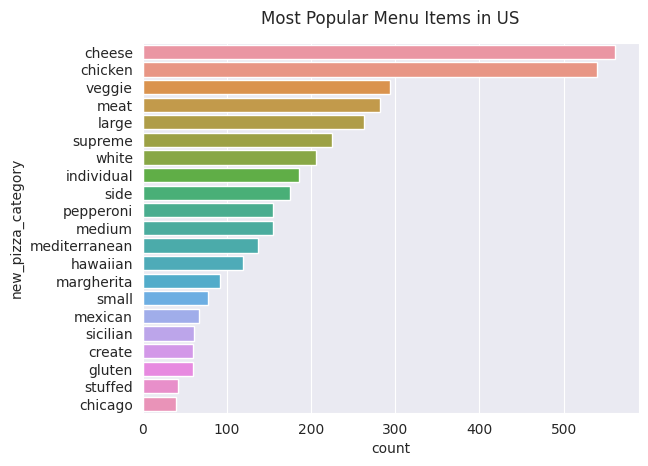

In [ ]:
# Get counts
counts = US_Pizza_Cities['new_pizza_category'].value_counts()

# Plot countplot
sns.set_style('darkgrid')
menu_cat_fig = sns.countplot(y="new_pizza_category", data=US_Pizza_Cities, order=counts.index)
menu_cat_fig.set_title("Most Popular Menu Items in US", y=1.03)
plt.show()

In [ ]:
#Creating counts for new_pizza_category
pizza_counts = US_Pizza_Cities.groupby(['city', 'new_pizza_category']).size().reset_index(name='count')
#Pivot Data of menu_counts index on city to see which menu item combinations have a correlation.
pizza_pivot = pizza_counts.pivot(index='city', columns='new_pizza_category', values='count')

<Axes: xlabel='new_pizza_category', ylabel='new_pizza_category'>

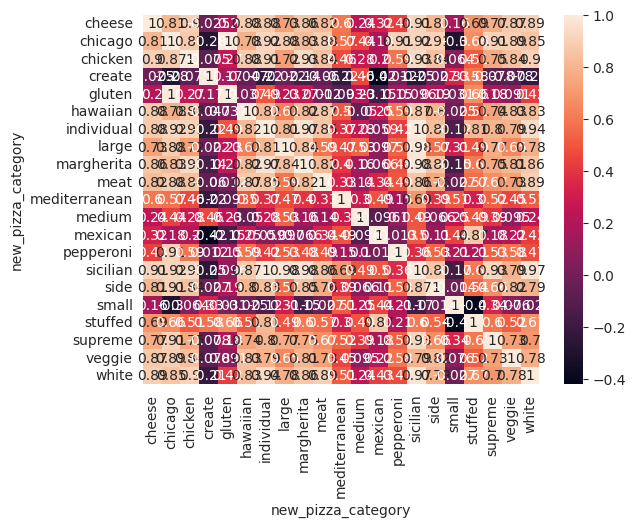

In [ ]:
sns.heatmap(pizza_pivot.corr(), annot=True)

In [ ]:
# Calculate frequency of each category by city
pizza_counts_city = US_Pizza_Cities.groupby(['city', 'new_pizza_category']).size().reset_index(name='count')

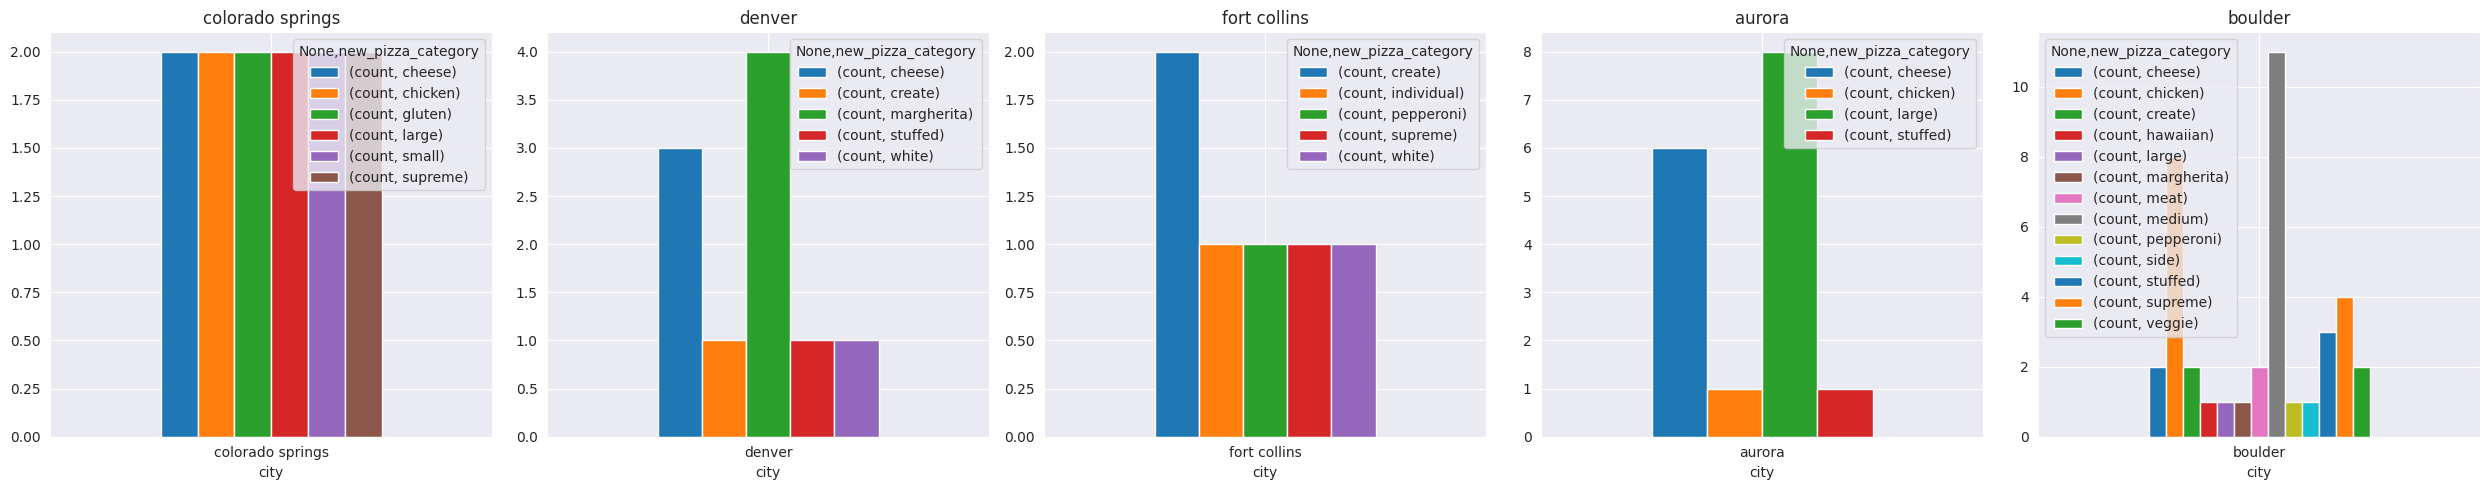

In [ ]:
#Create a function to see popular Pizza Menu Items for five cities.
def plot_city_counts(cities):

    num_plots = len(cities)

    # Create figure and axes
    fig, axs = plt.subplots(ncols=num_plots, figsize=(5*num_plots, 5))

    for i, city in enumerate(cities):

        # Filter data
        city_counts = pizza_counts_city[pizza_counts_city['city'] == city]

        # Plot city as bar chart
        city_counts.set_index(['city','new_pizza_category']).unstack().plot(kind='bar', ax=axs[i], rot=0)
        axs[i].set_title(city)

    plt.tight_layout()
    plt.show()

# Example
plot_city_counts(['colorado springs', 'denver', 'fort collins', 'aurora', 'boulder'])

In [ ]:
US_Pizza_Cities.shape

(3796, 24)

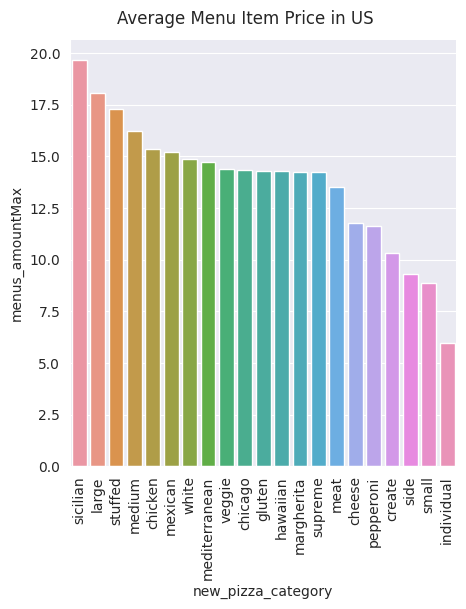

In [ ]:
#Average Prices for most popular CO Menu item.
sns.set_style('darkgrid')
order = US_Pizza_Cities.groupby('new_pizza_category')['menus_amountMax'].mean().sort_values().index
reversed_order= order[::-1]
price = sns.catplot(x="new_pizza_category", y="menus_amountMax", data=US_Pizza_Cities, kind="bar", errorbar=None, order=reversed_order)
price.fig.suptitle("Average Menu Item Price in US", y=1.03)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Build a Model that takes the most popular 'new_pizza_category' and finds the two highest correlated other categories
#and then splits into four price points at individual, small, medium larger for the five items per city. Test this
#against actual state data.
#1 Find most popular flavor 'new_pizza_category' per city.
#2 Find two most correlated flavors per city.
#3 Price point five flavors at four price points of individual, small, medium and large per city.


In [ ]:
import pandas as pd

# Convert to dataframe
pizza_df = pizza_pivot.reset_index(drop=True)

# Get list of categories
categories = pizza_df.columns.to_list()

# Empty list to store coefficients
coefficients = []

# Iterate through combinations
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]

        # Get correlation
        corr = pizza_df[cat1].corr(pizza_df[cat2])

        # Append coefficient and categories
        coefficients.append((cat1, cat2, corr))

# Sort by correlation coefficient
coefficients.sort(key=lambda x: x[2], reverse=True)

# Print sorted correlations
for corr in coefficients:
    print(f"{corr[0]} vs {corr[1]} = {corr[2]:.3f}")

chicago vs gluten = 1.000
individual vs sicilian = 0.996
large vs sicilian = 0.983
margherita vs sicilian = 0.982
sicilian vs white = 0.967
individual vs margherita = 0.966
individual vs white = 0.943
chicken vs sicilian = 0.929
chicken vs margherita = 0.928
sicilian vs supreme = 0.925
chicago vs individual = 0.923
chicago vs sicilian = 0.916
cheese vs sicilian = 0.914
chicago vs supreme = 0.911
chicago vs side = 0.910
chicken vs individual = 0.907
chicago vs pepperoni = 0.907
chicken vs white = 0.903
cheese vs chicken = 0.898
chicago vs veggie = 0.892
meat vs white = 0.892
cheese vs white = 0.889
chicago vs large = 0.885
cheese vs individual = 0.884
cheese vs hawaiian = 0.883
chicago vs meat = 0.879
chicken vs hawaiian = 0.878
hawaiian vs sicilian = 0.874
cheese vs veggie = 0.873
chicago vs chicken = 0.873
hawaiian vs meat = 0.872
cheese vs margherita = 0.868
sicilian vs side = 0.868
mexican vs stuffed = 0.866
margherita vs white = 0.864
margherita vs side = 0.858
meat vs sicilian = 0

In [ ]:
# Create the one-hot encoded DataFrame
onehot = pd.get_dummies(US_Pizza_Cities['new_pizza_category'])

# Join the one-hot encoded columns back to the original DataFrame
onehot_pizza = US_Pizza_Cities.join(onehot)

In [ ]:
onehot_pizza.head(1)

address     city country  latitude  longitude  \
1  3414 w union hills dr  phoenix      us  33.65465 -112.13275   

   menus_amountMax  menus_amountMin            menu_item        name  \
1              5.5              5.5  meatball pizza roll  rays pizza   

   postalCode  ...  medium  mexican pepperoni  sicilian  side  small  stuffed  \
1       85027  ...       0        0         0         0     0      0        0   

   supreme  veggie  white  
1        0       0      0  

[1 rows x 45 columns]

In [ ]:
onehot_pizza.to_excel('onehot_pizza.xlsx', index=False)

In [ ]:
US_Pizza_Cities.head()

address     city country   latitude   longitude  \
1     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
2     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
3     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
4  10720 w indian school rd  phoenix      us  33.495299 -112.290831   
5  10720 w indian school rd  phoenix      us  33.495299 -112.290831   

   menus_amountMax  menus_amountMin                            menu_item  \
1             5.50             5.50                  meatball pizza roll   
2             5.50             5.50    green pepper and onion pizza roll   
3             4.25             4.25  pizza fries with pepperoni or bacon   
4            21.95            21.95      brothers special sicilian pizza   
5             2.50             2.50                   pizza by the slice   

             name  postalCode  ...  female_population  foreign_born  \
1      rays pizza       85027  ...           776168.0      300702.0   
2      rays pizza       85027  ...           776168.0      300702.0   
3      rays pizza       85027  ...           776168.0      300702.0   
4  brothers pizza       85037  ...           776168.0      300702.0   
5  brothers pizza       85037  ...           776168.0      300702.0   

  average_household_size  male_population  median_age  number_of_veterans  \
1                   2.89         786833.0        33.8             72388.0   
2                   2.89         786833.0        33.8             72388.0   
3                   2.89         786833.0        33.8             72388.0   
4                   2.89         786833.0        33.8             72388.0   
5                   2.89         786833.0        33.8             72388.0   

     state  new_menu_category  word_cluster  new_pizza_category  
1  arizona               None          meat                meat  
2  arizona               None         green              veggie  
3  arizona          pepperoni     pepperoni           pepperoni  
4  arizona            special       special             supreme  
5  arizona               None         slice          individual  

[5 rows x 24 columns]

In [ ]:
# Group by ingredient and calculate average price
averages = US_Pizza_Cities.groupby('new_pizza_category').menus_amountMax.mean().reset_index()
averages.columns = ['new_pizza_category', 'avg_category_price']

# Merge average prices back into original dataframe
average_prices = US_Pizza_Cities.merge(averages, on='new_pizza_category', how='left')

average_prices.head()

address     city country   latitude   longitude  \
0     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
1     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
2     3414 w union hills dr  phoenix      us  33.654650 -112.132750   
3  10720 w indian school rd  phoenix      us  33.495299 -112.290831   
4  10720 w indian school rd  phoenix      us  33.495299 -112.290831   

   menus_amountMax  menus_amountMin                            menu_item  \
0             5.50             5.50                  meatball pizza roll   
1             5.50             5.50    green pepper and onion pizza roll   
2             4.25             4.25  pizza fries with pepperoni or bacon   
3            21.95            21.95      brothers special sicilian pizza   
4             2.50             2.50                   pizza by the slice   

             name  postalCode  ...  foreign_born  average_household_size  \
0      rays pizza       85027  ...      300702.0                    2.89   
1      rays pizza       85027  ...      300702.0                    2.89   
2      rays pizza       85027  ...      300702.0                    2.89   
3  brothers pizza       85037  ...      300702.0                    2.89   
4  brothers pizza       85037  ...      300702.0                    2.89   

  male_population  median_age  number_of_veterans    state  new_menu_category  \
0        786833.0        33.8             72388.0  arizona               None   
1        786833.0        33.8             72388.0  arizona               None   
2        786833.0        33.8             72388.0  arizona          pepperoni   
3        786833.0        33.8             72388.0  arizona            special   
4        786833.0        33.8             72388.0  arizona               None   

   word_cluster  new_pizza_category  avg_category_price  
0          meat                meat           13.487270  
1         green              veggie           14.373912  
2     pepperoni           pepperoni           11.623871  
3       special             supreme           14.225244  
4         slice          individual            5.775914  

[5 rows x 25 columns]

                            OLS Regression Results                            
Dep. Variable:     avg_category_price   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     881.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.10e-174
Time:                        00:16:54   Log-Likelihood:                -8995.3
No. Observations:                3796   AIC:                         1.799e+04
Df Residuals:                    3794   BIC:                         1.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.0040      0.096    1

<Axes: xlabel='menus_amountMax', ylabel='avg_category_price'>

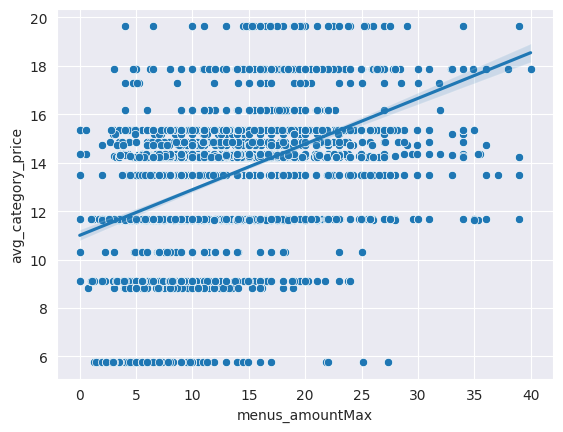

In [ ]:
import statsmodels.formula.api as smf

# Use full dataframe
df_sizes = average_prices

# Scatter plot
sns.scatterplot(x="menus_amountMax", y="avg_category_price", data=df_sizes)

# Linear regression
model = smf.ols('avg_category_price ~ menus_amountMax', data=df_sizes).fit()

# Print summary
print(model.summary())

# Plot regression line
sns.regplot(x="menus_amountMax", y="avg_category_price", data=df_sizes, scatter=False)

                            OLS Regression Results                            
Dep. Variable:     avg_category_price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     649.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.65e-101
Time:                        00:12:24   Log-Likelihood:                -1870.6
No. Observations:                 682   AIC:                             3745.
Df Residuals:                     680   BIC:                             3754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7295      0.290     

<Axes: xlabel='menus_amountMax', ylabel='avg_category_price'>

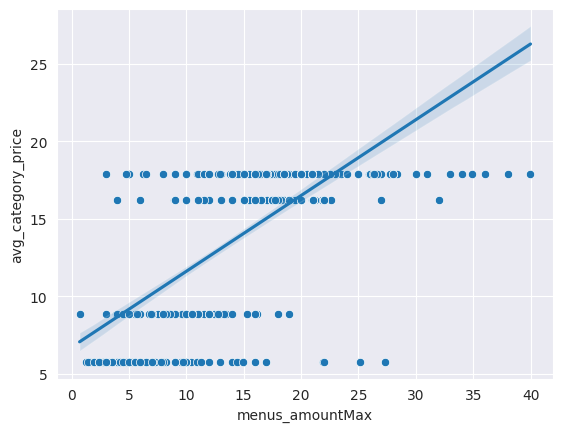

In [ ]:
import statsmodels.formula.api as smf

# Filter dataframe to just those 4 categories
df_sizes = average_prices[average_prices['new_pizza_category'].isin(['individual', 'small', 'medium', 'large'])]

# Scatter plot
sns.scatterplot(x="menus_amountMax", y="avg_category_price", data=df_sizes)

# Linear regression
model = smf.ols('avg_category_price ~ menus_amountMax', data=df_sizes).fit()

# Print summary
print(model.summary())

# Plot regression line
sns.regplot(x="menus_amountMax", y="avg_category_price", data=df_sizes, scatter=False)

In [ ]:
#LinearRegression
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

stops = ['pizza', 'pizzas']

def get_top_words(text, n=7, stopwords=stops):
    text = text.lower()
    words = re.split('\W+', text)
    words = [w for w in words if w not in stops]
    return ' '.join(sorted(set(words))[:n])

X_text = US_Pizza_Cities['menu_item'].apply(get_top_words)

y = US_Pizza_Cities['menus_amountMax']

model = LinearRegression()
model.fit(X, y)

print(model.score(X, y))

0.5433813479290728


In [ ]:
#RandomForestRegressor
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

stops = ['pizza', 'pizzas']

def get_top_words(text, n=7, stopwords=stops):
    text = text.lower()
    words = re.split('\W+', text)
    words = [w for w in words if w not in stops]
    return ' '.join(sorted(set(words))[:n])

X_text = US_Pizza_Cities['menu_item'].apply(get_top_words)

y = US_Pizza_Cities['menus_amountMax']

model = RandomForestRegressor()
model.fit(X, y)

print(model.score(X, y))

0.6990974403159875
